## **Part A - Perceptron Learning Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def train_test_split(data,split,randomize=True):

    split_index = int(split*len(data))  
    # randomly shuffles rows of the dataset
    if randomize == True:
        np.random.shuffle(data)  
    
    X = data[:,1:]
    y = data[:,0]
    
    train_X = X[:split_index]
    train_y = y[:split_index]
    
    test_X = X[split_index:]
    test_y = y[split_index:]
    
    return train_X,train_y,test_X,test_y

In [ ]:
class Perceptron:
    
    def predict(self,X):

        activations = X.dot(self.weights[1:])
        activations += self.weights[0]

        predictions  = np.heaviside(activations,0)


        return predictions
    
    def fit(self,train_X,train_y,iterations = 100,learning_rate = 0.0001):
        
        self.weights = np.random.normal(loc=0,scale=0.01,size=train_X.shape[1]+1)
        
        
        for i in tqdm(range(iterations)):

            predictions = self.predict(train_X)

            loss = np.sum(-1*(train_X.dot(self.weights[1:])+self.weights[0])*(train_y-predictions))

            for j,prediction in enumerate(predictions):
                self.weights += learning_rate*(np.insert(train_X[j],0,1))*(train_y[j]-prediction)
                
                
        print("Final loss = {:.2f}".format(loss))

In [ ]:
def evaluate(train_X,train_y,test_X,test_y,perceptron):

    train_predictions = perceptron.predict(train_X)
    test_predictions = perceptron.predict(test_X)

    testing_accuracy = 100*np.sum((test_predictions == test_y))/len(test_y)
    training_accuracy = 100*np.sum((train_predictions == train_y))/len(train_y)

    # print("Training accuracy = {:.2f}%".format(training_accuracy))
    # print("Testing accuracy = {:.2f}%".format(testing_accuracy))
    return testing_accuracy, training_accuracy

In [ ]:
def get_metrics(y_true, y_pred):
  tp, tn, fp, fn = 0, 0, 0, 0
  metric_val = dict()
  for i in range(y_pred.shape[0]):
    if(y_pred[i] == 1 and y_true[i] == 1):
      tp+=1
    elif(y_pred[i] == 0 and y_true[i] == 0):
      tn+=1
    elif(y_pred[i] == 1 and y_true[i] == 0):
      fp+=1
    elif(y_pred[i] == 0 and y_true[i] == 1):
      fn+=1
  accuracy = (tp + tn)/len(y_true)
  recall = tp/(tp + fn)
  precision = tp/(tp + fp)
  metric_val['Recall'] = recall
  metric_val['Precision'] = precision
  metric_val['Accuracy'] = accuracy
  return metric_val

In [ ]:
df = pd.read_csv('/content/Dsata Set for Assignment 1.csv',header = None)

In [ ]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df = df.drop([df.index[0]])

In [ ]:
df.columns = ["diagnosis",	"radius_mean",	"texture_mean",	"perimeter_mean",	"area_mean",	"smoothness_mean",	"compactness_mean",	"concavity_mean",	"concave points_mean",	"symmetry_mean",	"fractal_dimension_mean",	"radius_se",	"texture_se",	"perimeter_se",	"area_se",	"smoothness_se",	"compactness_se",	"concavity_se",	"concave points_se",	"symmetry_se",	"fractal_dimension_se",	"radius_worst",	"texture_worst",	"perimeter_worst",	"area_worst",	"smoothness_worst",	"compactness_worst",	"concavity_worst",	"concave points_worst",	"symmetry_worst",	"fractal_dimension_worst"]

In [ ]:
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,1,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,1,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,1,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [ ]:
for cols in df.columns:
  df[cols] = pd.to_numeric(df[cols])

In [ ]:
df = df.dropna()

Distribution of diagnosis

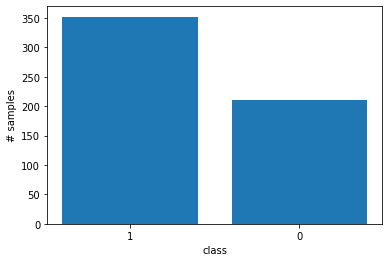

In [ ]:
counts = df['diagnosis'].value_counts()
plt.bar(['1','0'], counts)
plt.xlabel('class')
plt.ylabel('# samples')
plt.show()

In [ ]:
data = df.values

PM1 and PM2

In [ ]:
model1_test_acc,model1_train_acc = 0,0
model2_test_acc,model2_train_acc = 0,0
test_acc1, test_recall1, test_precision1 = 0,0,0
train_acc1, train_recall1, train_precision1 = 0,0,0
test_acc2, test_recall2, test_precision2 = 0,0,0
train_acc2, train_recall2, train_precision2 = 0,0,0
test1_acc_list, train1_acc_list = list(), list()
test2_acc_list, train2_acc_list = list(), list()
for i in range(10):
  #PM1
  train_X,train_y,test_X,test_y = train_test_split(data,0.67)
  perceptron = Perceptron()
  perceptron.fit(train_X,train_y,iterations=2000,learning_rate = 0.00000001)
  test1_acc,train1_acc = evaluate(train_X,train_y,test_X,test_y,perceptron)
  test1_acc_list.append(test1_acc)
  train1_acc_list.append(train1_acc)
  model1_test_acc += test1_acc
  model1_train_acc += train1_acc
  y_pred = perceptron.predict(test_X)
  metric_test_val1 = get_metrics(test_y, y_pred)
  test_acc1 += metric_test_val1["Accuracy"]
  test_recall1 += metric_test_val1["Recall"]
  test_precision1 += metric_test_val1["Precision"]
  y_pred = perceptron.predict(train_X)
  metric_train_val1 = get_metrics(train_y, y_pred)
  train_acc1 += metric_train_val1["Accuracy"]
  train_recall1 += metric_train_val1["Recall"]
  train_precision1 += metric_train_val1["Precision"]
  #PM2
  data1 = np.concatenate((train_X, train_y[:,np.newaxis]), axis = 1)
  np.random.shuffle(data1)
  train_X = data1[:,:-1]
  train_y = data1[:,-1]
  perceptron2 = Perceptron()
  perceptron2.fit(train_X,train_y,iterations=2000,learning_rate = 0.00000001)
  test2_acc,train2_acc = evaluate(train_X,train_y,test_X,test_y,perceptron2)
  test2_acc_list.append(test2_acc)
  train2_acc_list.append(train2_acc)
  model2_test_acc += test2_acc
  model2_train_acc += train2_acc
  y_pred = perceptron2.predict(test_X)
  metric_test_val2 = get_metrics(test_y, y_pred)
  test_acc2 += metric_test_val2["Accuracy"]
  test_recall2 += metric_test_val2["Recall"]
  test_precision2 += metric_test_val2["Precision"]
  y_pred = perceptron.predict(train_X)
  metric_train_val2 = get_metrics(train_y, y_pred)
  train_acc2 += metric_train_val2["Accuracy"]
  train_recall2 += metric_train_val2["Recall"]
  train_precision2 += metric_train_val2["Precision"]
print("Testing and Traning accuracy for PM1: {} {}".format(model1_test_acc/10, model1_train_acc/10))
print("Testing and Traning accuracy for PM2: {} {}".format(model2_test_acc/10, model2_train_acc/10))
print("Test Accuracy, Recall and Precision for PM1: {} {} {}".format(test_acc1/10, test_recall1/10, test_precision1/10))
print("Train Accuracy, Recall and Precision for PM1: {} {} {}".format(train_acc1/10, train_recall1/10, train_precision1/10))
print("Test Accuracy, Recall and Precision for PM2: {} {} {}".format(test_acc2/10, test_recall2/10, test_precision2/10))
print("Train Accuracy, Recall and Precision for PM2: {} {} {}".format(train_acc2/10, train_recall2/10, train_precision2/10))

100%|██████████| 2000/2000 [00:40<00:00, 48.82it/s]


Final loss = 6.36


100%|██████████| 2000/2000 [00:25<00:00, 80.00it/s]


Final loss = 4.62


100%|██████████| 2000/2000 [00:27<00:00, 73.75it/s]


Final loss = 8.92


100%|██████████| 2000/2000 [00:28<00:00, 70.84it/s]


Final loss = 6.39


100%|██████████| 2000/2000 [00:27<00:00, 72.89it/s]


Final loss = 4.98


100%|██████████| 2000/2000 [00:26<00:00, 74.98it/s]


Final loss = 3.76


100%|██████████| 2000/2000 [00:25<00:00, 78.62it/s]


Final loss = 5.42


100%|██████████| 2000/2000 [00:26<00:00, 76.59it/s]


Final loss = 5.64


100%|██████████| 2000/2000 [00:26<00:00, 74.74it/s]


Final loss = 5.39


100%|██████████| 2000/2000 [00:26<00:00, 74.51it/s]


Final loss = 47.93


100%|██████████| 2000/2000 [00:26<00:00, 74.53it/s]


Final loss = 4.44


100%|██████████| 2000/2000 [00:24<00:00, 81.99it/s]


Final loss = 3.54


100%|██████████| 2000/2000 [00:27<00:00, 73.88it/s]


Final loss = 4.40


100%|██████████| 2000/2000 [00:26<00:00, 74.32it/s]


Final loss = 13.06


100%|██████████| 2000/2000 [00:27<00:00, 73.25it/s]


Final loss = 5.79


100%|██████████| 2000/2000 [00:26<00:00, 75.26it/s]


Final loss = 5.07


100%|██████████| 2000/2000 [00:25<00:00, 77.90it/s]


Final loss = 6.87


100%|██████████| 2000/2000 [00:27<00:00, 73.33it/s]


Final loss = 7.00


100%|██████████| 2000/2000 [00:27<00:00, 72.70it/s]


Final loss = 4.54


100%|██████████| 2000/2000 [00:27<00:00, 71.62it/s]

Final loss = 5.51
Testing and Traning accuracy for PM1: 89.78494623655914 90.6896551724138
Testing and Traning accuracy for PM2: 83.70967741935483 85.06631299734747
Test Accuracy, Recall and Precision for PM1: 0.8978494623655914 0.8710390045836791 0.8557654333332729
Train Accuracy, Recall and Precision for PM1: 0.9068965517241379 0.8817614885267308 0.8805068353017378
Test Accuracy, Recall and Precision for PM2: 0.8370967741935482 0.8939059092874784 0.8034655916820386
Train Accuracy, Recall and Precision for PM2: 0.9068965517241379 0.8817614885267308 0.8805068353017378


PM3

In [ ]:
### Normalization of data ###
df1 = df
for col in df1.columns[1:]:
  df1[col] = (df1[col] - df1[col].mean())/df1[col].std()

In [ ]:
data = df1.values

In [ ]:
model3_test_acc,model3_train_acc = 0,0
test_acc3, test_recall3, test_precision3 = 0,0,0
train_acc3, train_recall3, train_precision3 = 0,0,0
test3_acc_list, train3_acc_list = list(), list()
for i in range(10):
  train_X,train_y,test_X,test_y = train_test_split(data,0.67)
  perceptron3 = Perceptron()
  perceptron3.fit(train_X,train_y,iterations=2000,learning_rate = 0.0000001)
  test3_acc,train3_acc = evaluate(train_X,train_y,test_X,test_y,perceptron3)
  test3_acc_list.append(test3_acc)
  train3_acc_list.append(train3_acc)
  model3_test_acc += test3_acc
  model3_train_acc += train3_acc
  y_pred = perceptron3.predict(test_X)
  matric_test_val3 = get_metrics(test_y, y_pred)
  test_acc3 += matric_test_val3["Accuracy"]
  test_recall3 += matric_test_val3["Recall"]
  test_precision3 += matric_test_val3["Precision"]
  y_pred = perceptron3.predict(train_X)
  matric_train_val3 = get_metrics(train_y, y_pred)
  train_acc3 += matric_train_val3["Accuracy"]
  train_recall3 += matric_train_val3["Recall"]
  train_precision3 += matric_train_val3["Precision"]
print("Testing and Traning accuracy for PM3: {} {}".format(model3_test_acc/10, model3_train_acc/10))
print("Test Accuracy, Recall and Precision for PM3: {} {} {}".format(test_acc3/10, test_recall3/10, test_precision3/10))
print("Train Accuracy, Recall and Precision for PM3: {} {} {}".format(train_acc3/10, train_recall3/10, train_precision3/10))

100%|██████████| 2000/2000 [00:26<00:00, 76.32it/s]


Final loss = 0.15


100%|██████████| 2000/2000 [00:26<00:00, 74.28it/s]


Final loss = 0.35


100%|██████████| 2000/2000 [00:27<00:00, 73.98it/s]


Final loss = 0.56


100%|██████████| 2000/2000 [00:27<00:00, 73.30it/s]


Final loss = 0.19


100%|██████████| 2000/2000 [00:26<00:00, 74.39it/s]


Final loss = 0.13


100%|██████████| 2000/2000 [00:27<00:00, 73.33it/s]


Final loss = 0.21


100%|██████████| 2000/2000 [00:25<00:00, 79.60it/s]


Final loss = 0.16


100%|██████████| 2000/2000 [00:27<00:00, 73.71it/s]


Final loss = 0.18


100%|██████████| 2000/2000 [00:28<00:00, 71.37it/s]


Final loss = 0.15


100%|██████████| 2000/2000 [00:27<00:00, 72.67it/s]

Final loss = 0.26
Testing and Traning accuracy for PM3: 93.70967741935483 95.25198938992042
Test Accuracy, Recall and Precision for PM3: 0.9370967741935484 0.9795135556931331 0.8722278840477055
Train Accuracy, Recall and Precision for PM3: 0.9525198938992043 0.9862958545878394 0.8982382930346887


PM4

In [ ]:
features_list = ["radius_mean",	"texture_mean",	"perimeter_mean",	"area_mean",	"smoothness_mean",	"compactness_mean",	"concavity_mean",	"concave points_mean",	"symmetry_mean",	"fractal_dimension_mean",	"radius_se",	"texture_se",	"perimeter_se",	"area_se",	"smoothness_se",	"compactness_se",	"concavity_se",	"concave points_se",	"symmetry_se",	"fractal_dimension_se",	"radius_worst",	"texture_worst",	"perimeter_worst",	"area_worst",	"smoothness_worst",	"compactness_worst",	"concavity_worst",	"concave points_worst",	"symmetry_worst",	"fractal_dimension_worst"]
model4_test_acc,model4_train_acc = 0,0
test_acc4, test_recall4, test_precision4 = 0,0,0
train_acc4, train_recall4, train_precision4 = 0,0,0
test4_acc_list, train4_acc_list = list(), list()
for i in range(10):
  np.random.shuffle(features_list)
  features_list.insert(0,"diagnosis")
  # features_list
  df_random_order = df[features_list]
  data = df_random_order.values
  train_X,train_y,test_X,test_y = train_test_split(data,0.67)
  perceptron4 = Perceptron()
  perceptron4.fit(train_X,train_y,iterations=2000,learning_rate = 0.0000001)
  test4_acc,train4_acc = evaluate(train_X,train_y,test_X,test_y,perceptron4)
  test4_acc_list.append(test4_acc)
  train4_acc_list.append(train4_acc)
  model4_test_acc += test4_acc
  model4_train_acc += train4_acc
  y_pred = perceptron4.predict(test_X)
  metric_test_val4 = get_metrics(test_y, y_pred)
  test_acc4 += metric_test_val4["Accuracy"]
  test_recall4 += metric_test_val4["Recall"]
  test_precision4 += metric_test_val4["Precision"]
  y_pred = perceptron4.predict(train_X)
  metric_train_val4 = get_metrics(train_y, y_pred)
  train_acc4 += metric_train_val4["Accuracy"]
  train_recall4 += metric_train_val4["Recall"]
  train_precision4 += metric_train_val4["Precision"]
print("Testing and Traning accuracy for PM4: {} {}".format(model4_test_acc/10, model4_train_acc/10))
print("Test Accuracy, Recall and Precision for PM4: {} {} {}".format(test_acc4/10, test_recall4/10, test_precision4/10))
print("Train Accuracy, Recall and Precision for PM4: {} {} {}".format(train_acc4/10, train_recall4/10, train_precision4/10))

100%|██████████| 2000/2000 [00:26<00:00, 74.42it/s]


Final loss = 0.30


100%|██████████| 2000/2000 [00:26<00:00, 75.10it/s]


Final loss = 0.31


100%|██████████| 2000/2000 [00:27<00:00, 73.23it/s]


Final loss = 0.27


100%|██████████| 2000/2000 [00:28<00:00, 71.22it/s]


Final loss = 0.53


100%|██████████| 2000/2000 [00:26<00:00, 74.94it/s]


Final loss = 0.10


100%|██████████| 2000/2000 [00:25<00:00, 79.18it/s]


Final loss = 0.20


100%|██████████| 2000/2000 [00:26<00:00, 74.53it/s]


Final loss = 0.40


100%|██████████| 2000/2000 [00:27<00:00, 72.36it/s]


Final loss = 0.21


100%|██████████| 2000/2000 [00:27<00:00, 73.73it/s]


Final loss = 0.17


100%|██████████| 2000/2000 [00:26<00:00, 75.10it/s]

Final loss = 0.14
Testing and Traning accuracy for PM4: 93.17204301075269 94.61538461538461
Test Accuracy, Recall and Precision for PM3: 0.9317204301075268 0.9278628431871502 0.8995532390120932
Train Accuracy, Recall and Precision for PM3: 0.9461538461538461 0.9474221043211916 0.9132286089555273


In [ ]:
#PM1
print("PM1 Training Accuracy,PM1 Testing Accuracy")
for i in range(len(test1_acc_list)):
  print("{},{}".format(train1_acc_list[i],test1_acc_list[i]))
#PM2
print("\nPM2 Training Accuracy,PM2 Testing Accuracy")
for i in range(len(test2_acc_list)):
  print("{},{}".format(train2_acc_list[i],test2_acc_list[i]))
#PM3
print("\nPM3 Training Accuracy,PM3 Testing Accuracy")
for i in range(len(test3_acc_list)):
  print("{},{}".format(train3_acc_list[i],test3_acc_list[i]))
#PM4
print("\nPM4 Training Accuracy,PM4 Testing Accuracy")
for i in range(len(test4_acc_list)):
  print("{},{}".format(train4_acc_list[i],test4_acc_list[i]))

## **Part B – Fisher’s Linear Discriminant Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Dsata Set for Assignment 1.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)
df
# df["diagnosis"].isna().sum()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
def data_split(df):
    df=df.replace([""," ","No Data" ],np.nan)
    df=df.dropna()
#     df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
    
    #Feature Engineering 1
    for col in df.columns[1:]:
        df[col] = df[col].fillna(df[col].mean())
    
    #Feature Engineering 2
    for col in df.columns[1:]:
        df[col] = (df[col] - df[col].mean())/df[col].std()

    df_train=df.sample(frac=0.67)
    df_test=df.drop(df_train.index,axis=0)

    y_train=df_train["diagnosis"]
    y_test=df_test["diagnosis"]

    X_train=df_train.drop(["diagnosis"],axis=1)
    X_test=df_test.drop(["diagnosis"],axis=1)
    
    return X_train,X_test,y_train,y_test

In [ ]:
def find_vector(X_train,y_train):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    w=clf.coef_
    w=w.T
    return w

In [ ]:
def get_intersection(m1,m2,s1,s2):
    a = 1/(2*s1**2) - 1/(2*s2**2)
    b = m2/(s2**2) - m1/(s1**2)
    c = m1**2 /(2*s1**2) - m2**2 / (2*s2**2) - np.log(s2/s1)
    a = a.to_numpy()
    b = b.to_numpy()
    c = c.to_numpy()
    a = a.reshape(-1)
    b = b.reshape(-1)
    c = c.reshape(-1)
    roots = np.roots([a[0], b[0], c[0]])
    if len(roots) == 2:
        return roots
    else:
        return roots[0]

In [ ]:
def evaluate(X_test,y_test,w, threshold):
    y_test = y_test.to_numpy()
    y_test = y_test.reshape(y_test.shape[0],1)
    res = np.where(X_test.dot(w)-threshold >=0 , "M", "B")
    
    accuracy = 100*np.sum((res == y_test))/len(y_test)
    return accuracy

In [ ]:
def evaluate_total(X_test,y_test,w, threshold):
    y_test = y_test.to_numpy()
    y_test = y_test.reshape(y_test.shape[0],1)
    pred = np.where(X_test.dot(w)-threshold >=0 , "M", "B")
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(pred.shape[0]):
        if(pred[i] == "M" and y_test[i] == "M"):
          tp+=1
        elif(pred[i] == "B" and y_test[i] == "B"):
          tn+=1
        elif(pred[i] == "M" and y_test[i] == "B"):
          fp+=1
        elif(pred[i] == "B" and y_test[i] == "M"):
          fn+=1    
    accuracy = (tp + tn)/len(y_test)
    recall = tp/(tp + fn)
    precision = tp/(tp + fp)
    return accuracy,precision,recall

In [ ]:
def generate_threshold(df,X_train,y_train,w):
    m=[0,0]
    s=[0,0]
    # go through each class
    diagnosis = np.unique(df['diagnosis'].values)

    for i,result in enumerate(diagnosis):
        # find corresponding projections of that class
        projections = X_train[y_train==result].dot(w)
    #     print("Class:"+result)

        # mean of projections
        projections_mean = np.mean(projections)
        m[i]=projections_mean
    #     print("Mean:"+str(m[i]))

        # std of projections
        projections_std = np.std(projections)
        s[i] = projections_std
    #     print("Std dev:"+str(s[i]))

    thresholds = get_intersection(m[0],m[1],s[0],s[1])
    if evaluate(X_test,y_test,w, thresholds[1])>evaluate(X_test,y_test,w, thresholds[0]):
        index=1
    else:
        index=0
    threshold = thresholds[index]
    return threshold,m,s

In [ ]:
def norm_dist(x , mean , sd):

    mean = np.full_like(x, mean)
    sd=np.full_like(x,sd)
    prob_density = (1/(np.sqrt(2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [ ]:
def plot_onedim(m,s):
    colors = ['b','r']

    x_data = np.arange(-15,15,0.01)
    plt.figure(figsize=(20, 10))
    plt.plot(x_data, norm_dist(x_data, m[0], s[0]),c=colors[0])
    plt.plot(x_data, norm_dist(x_data, m[1], s[1]),c=colors[1])
    plt.scatter(np.array([threshold]),np.zeros_like(np.array([threshold])),c='g')
    plt.axvline(x=threshold)
    plt.legend(['Benign','Malignant','intersection'])
    plt.title("Both distributions side by side")
    plt.show()

Batch Training Accuracy,Batch Testing Accuracy


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


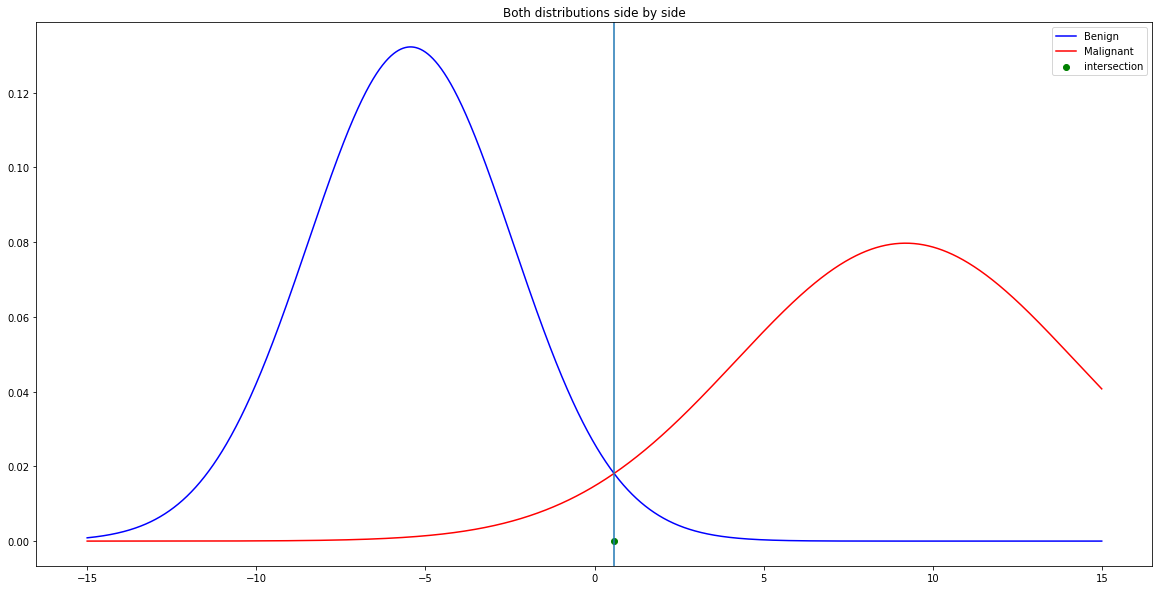

0.9840848806366048,0.967741935483871
Threshold of FLDM1:  0.5744283564718661


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


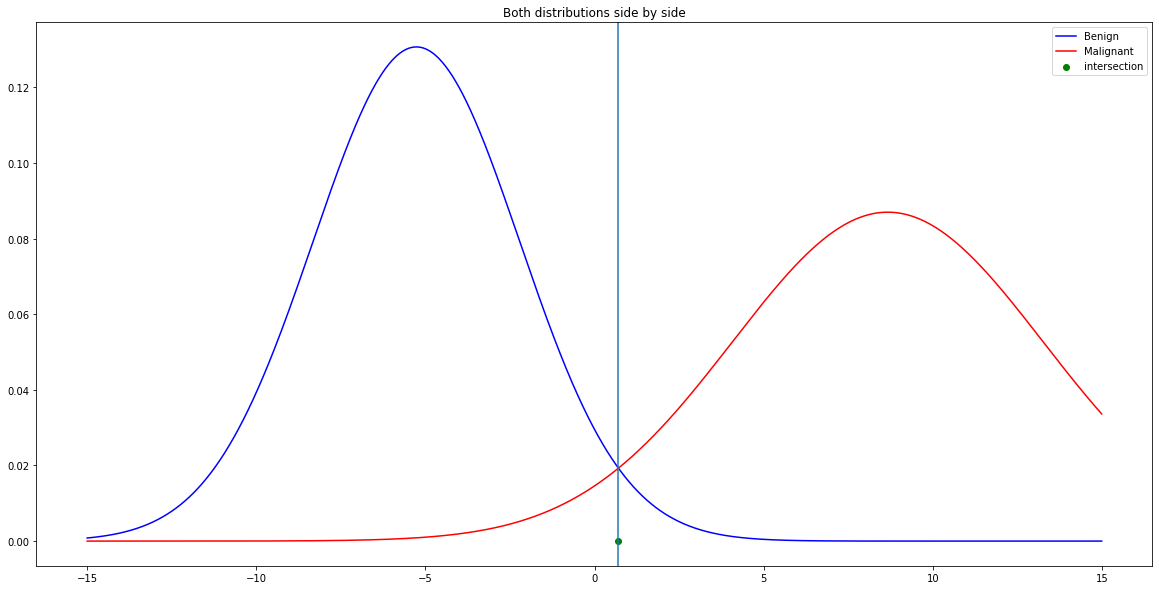

0.9814323607427056,0.967741935483871
Threshold of FLDM1:  0.7036325661873228


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


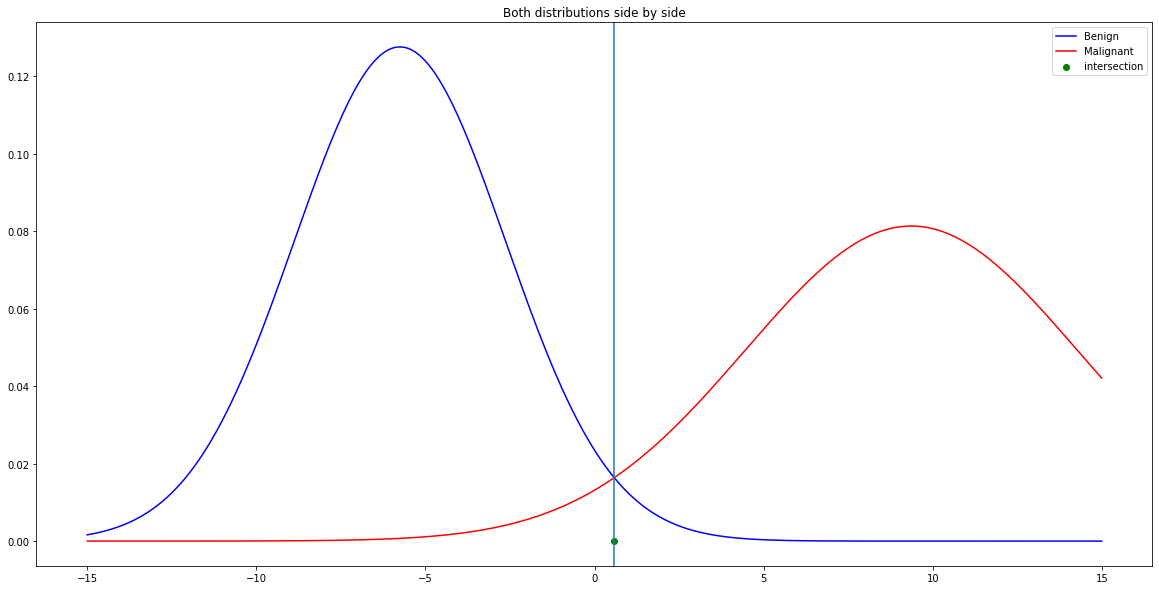

0.9814323607427056,0.978494623655914
Threshold of FLDM1:  0.5789391222931821


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


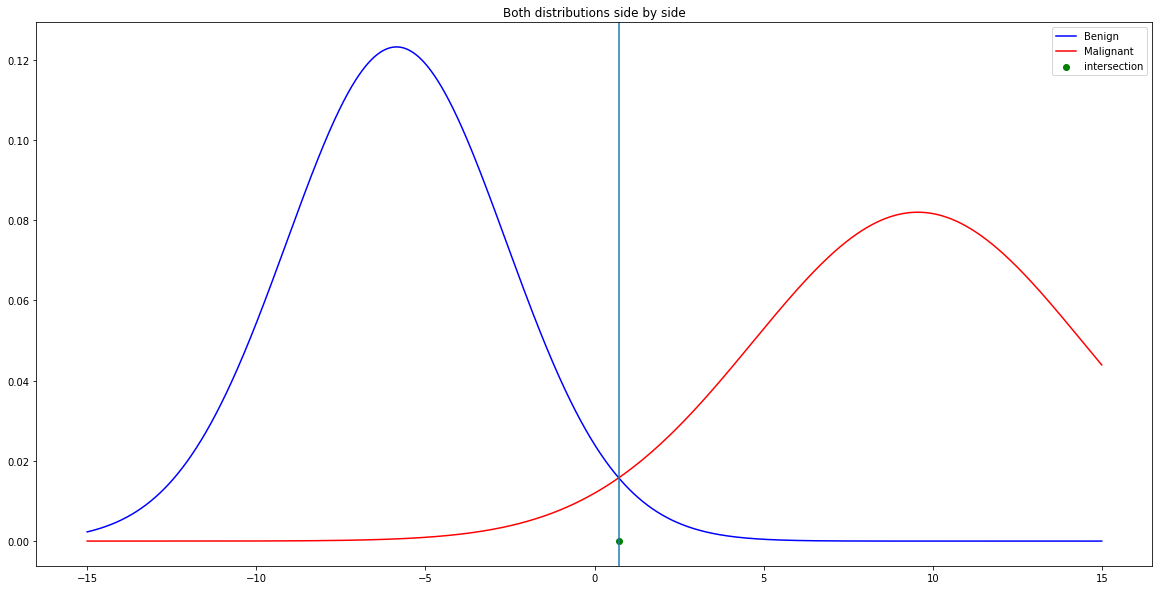

0.9814323607427056,0.956989247311828
Threshold of FLDM1:  0.712381168985265


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


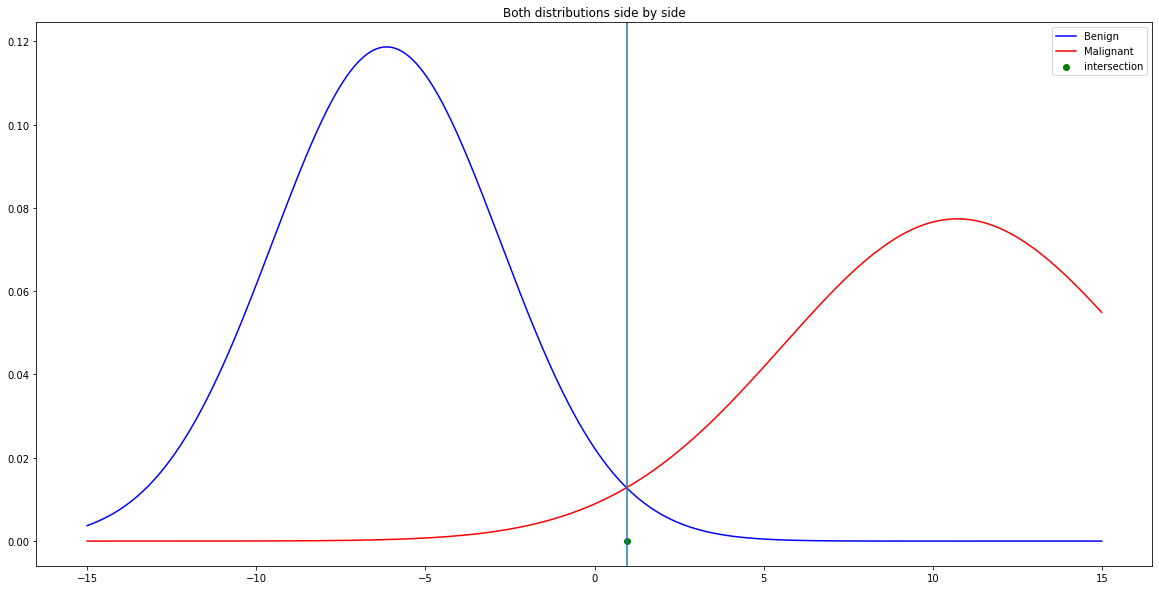

0.9840848806366048,0.9516129032258065
Threshold of FLDM1:  0.9425574649946675


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


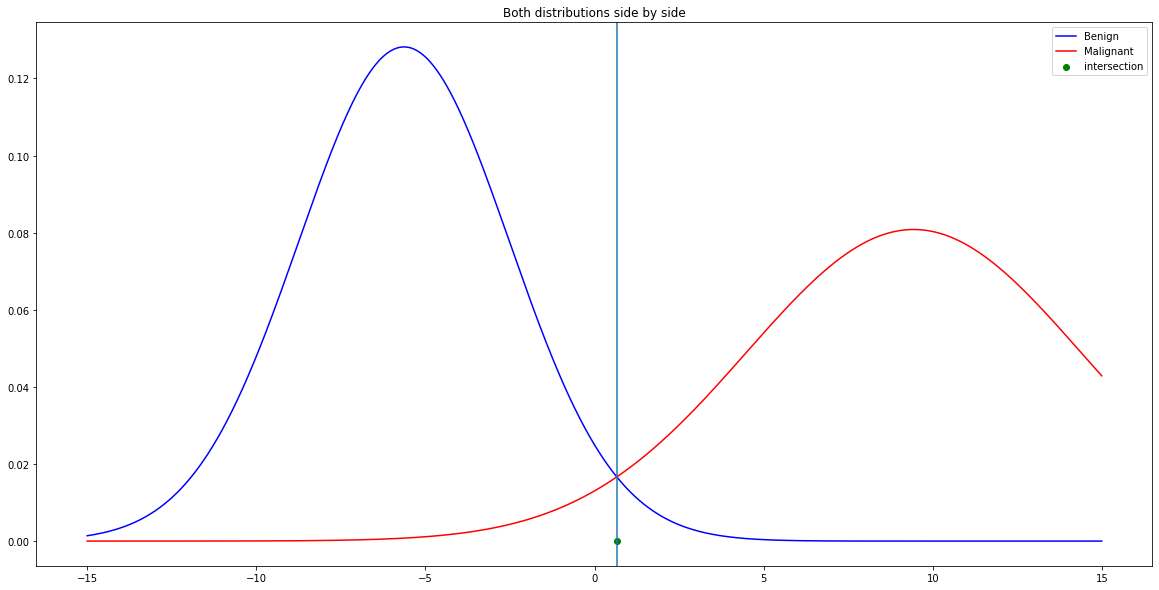

0.9761273209549072,0.956989247311828
Threshold of FLDM1:  0.6554610914213735


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


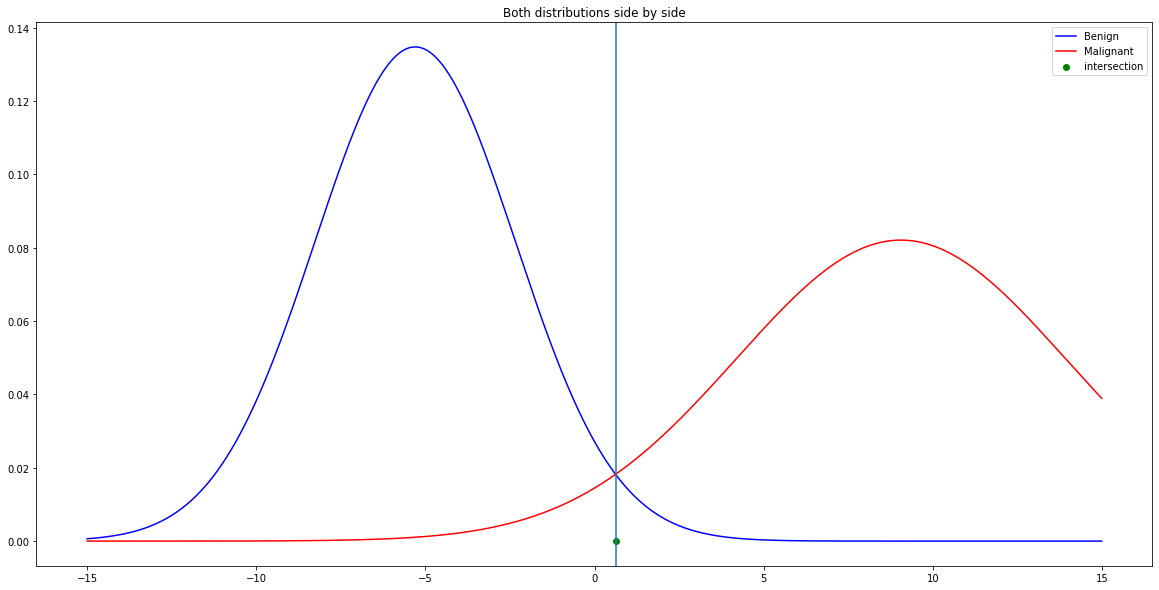

0.9761273209549072,0.9623655913978495
Threshold of FLDM1:  0.6189548737953876


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


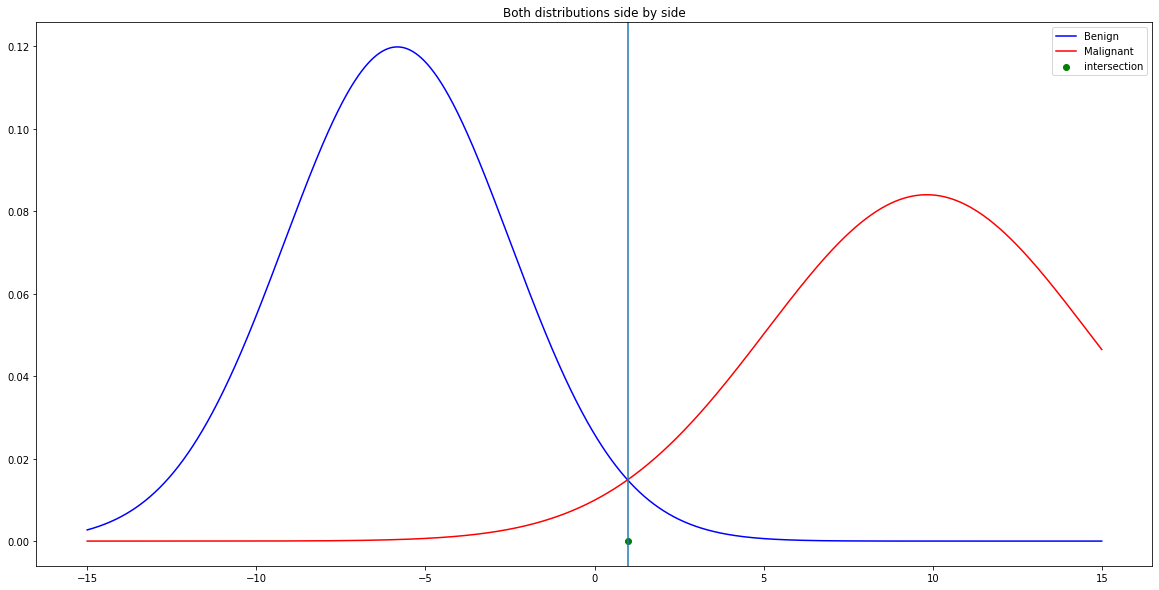

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.9840848806366048,0.967741935483871
Threshold of FLDM1:  0.9742041067136789


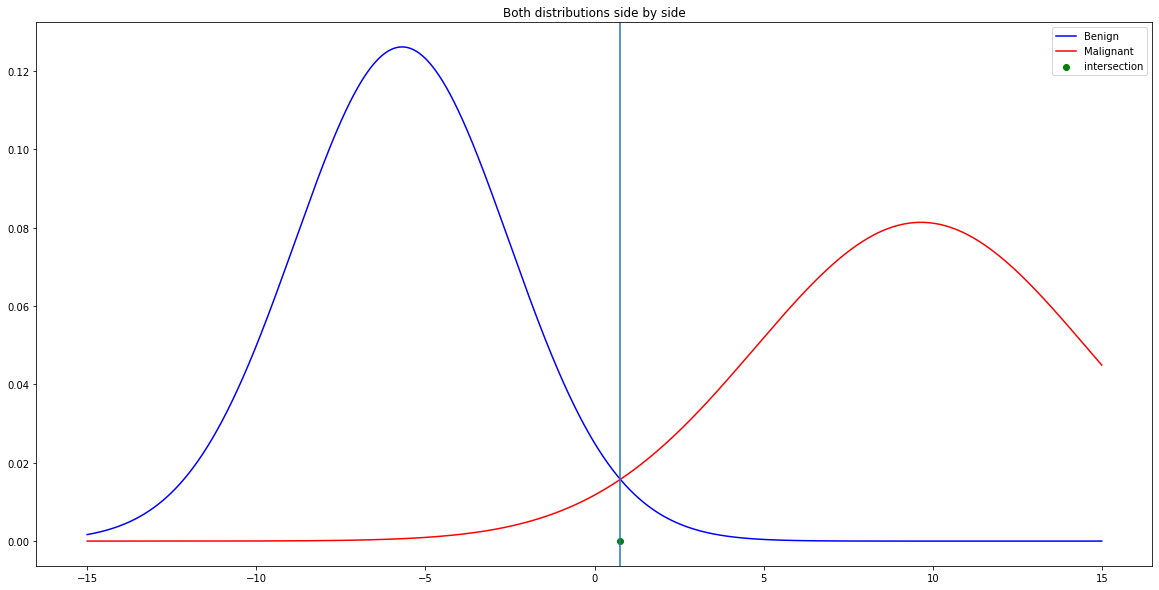

0.9787798408488063,0.9623655913978495
Threshold of FLDM1:  0.7602432577493877


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


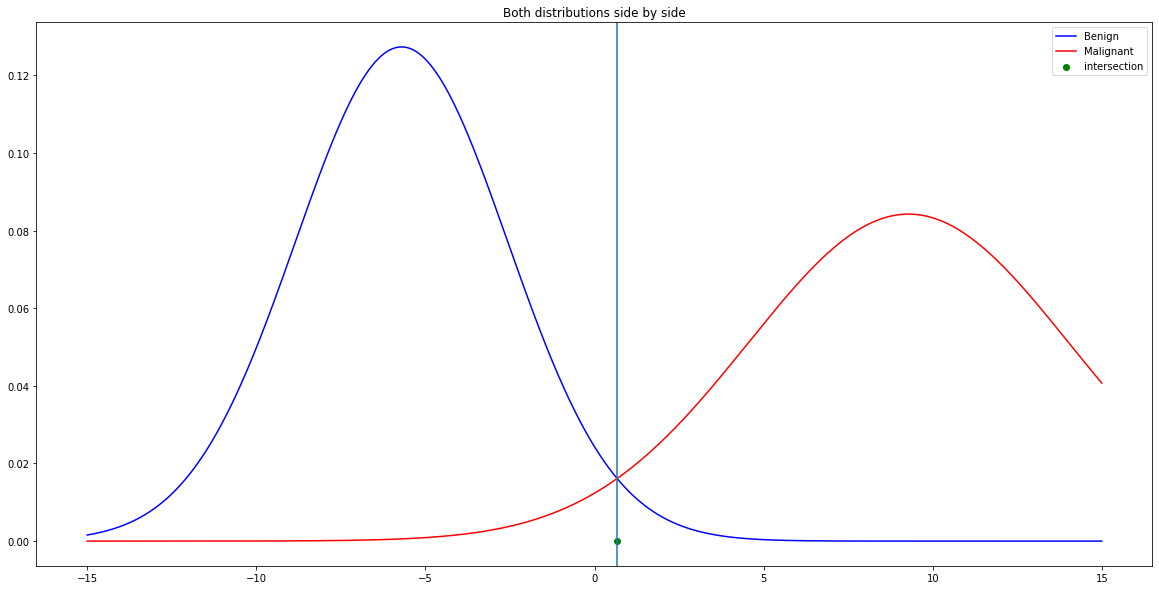

0.9761273209549072,0.978494623655914
Threshold of FLDM1:  0.6651150613261868
Average training accuracy of FLDM1:  0.9803713527851459
Average training precision of FLDM1:  0.9840751272227924
Average training recall of FLDM1:  0.9629194104308725
Average testing accuracy of FLDM1:  0.9650537634408602
Average testing precision of FLDM1:  0.9642739835455434
Average testing recall of FLDM1:  0.9436716349451808


In [ ]:
#FLDM1
df=pd.read_csv("Dsata Set for Assignment 1.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)
print("Batch Training Accuracy,Batch Testing Accuracy")
sum_accuracy=0
sum_precision=0
sum_recall=0
sum_accuracy_train=0
sum_precision_train=0
sum_recall_train=0
for i in range(10):
    X_train,X_test,y_train,y_test=data_split(df)
    w=find_vector(X_train,y_train)
    threshold,m,s=generate_threshold(df,X_train,y_train,w)
    plot_onedim(m,s)
    accuracy,precision,recall=evaluate_total(X_test,y_test,w, threshold)
    sum_accuracy+=accuracy
    sum_precision+=precision
    sum_recall+=recall
    training_accuracy,training_precision,training_recall=evaluate_total(X_train,y_train,w, threshold)
    sum_accuracy_train+=training_accuracy
    sum_precision_train+=training_precision
    sum_recall_train+=training_recall
    print(str(training_accuracy)+","+str(accuracy))
    print("Threshold of FLDM1: ",threshold)
avg_accuracy=sum_accuracy/10
avg_accuracy_train=sum_accuracy_train/10
avg_precision_train=sum_precision_train/10
avg_recall_train=sum_recall_train/10
avg_precision=sum_precision/10
avg_recall=sum_recall/10
print("Average training accuracy of FLDM1: ",avg_accuracy_train)
print("Average training precision of FLDM1: ",avg_precision_train)
print("Average training recall of FLDM1: ",avg_recall_train)
print("Average testing accuracy of FLDM1: ",avg_accuracy)
print("Average testing precision of FLDM1: ",avg_precision)
print("Average testing recall of FLDM1: ",avg_recall)

Batch Training Accuracy,Batch Testing Accuracy


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


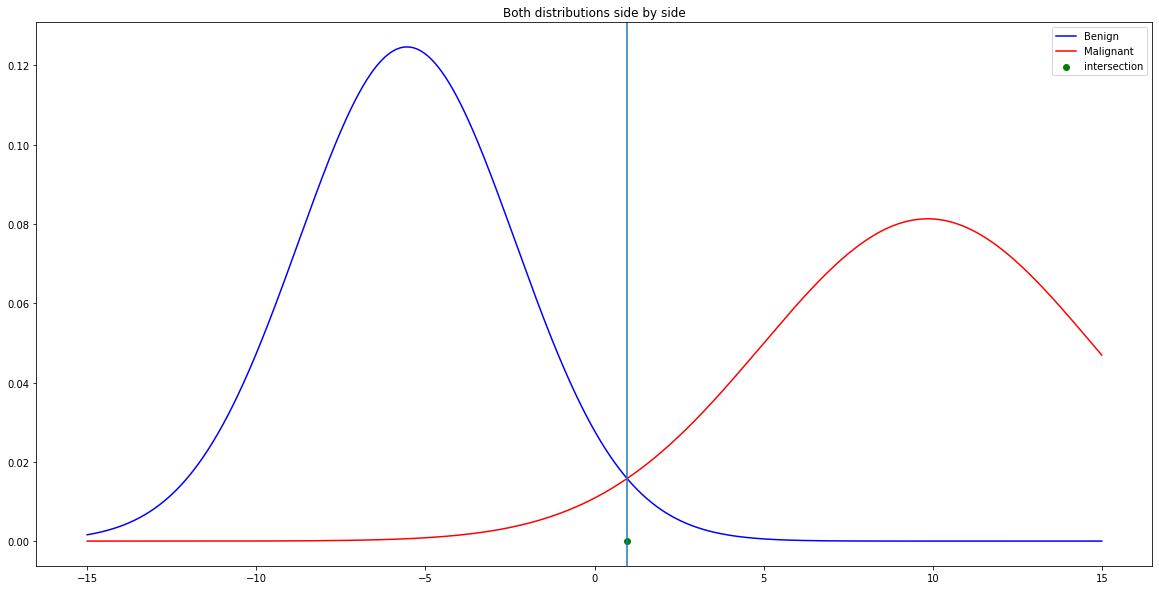

0.9734748010610079,0.967741935483871
Threshold of FLDM2:  0.9600548264389185


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


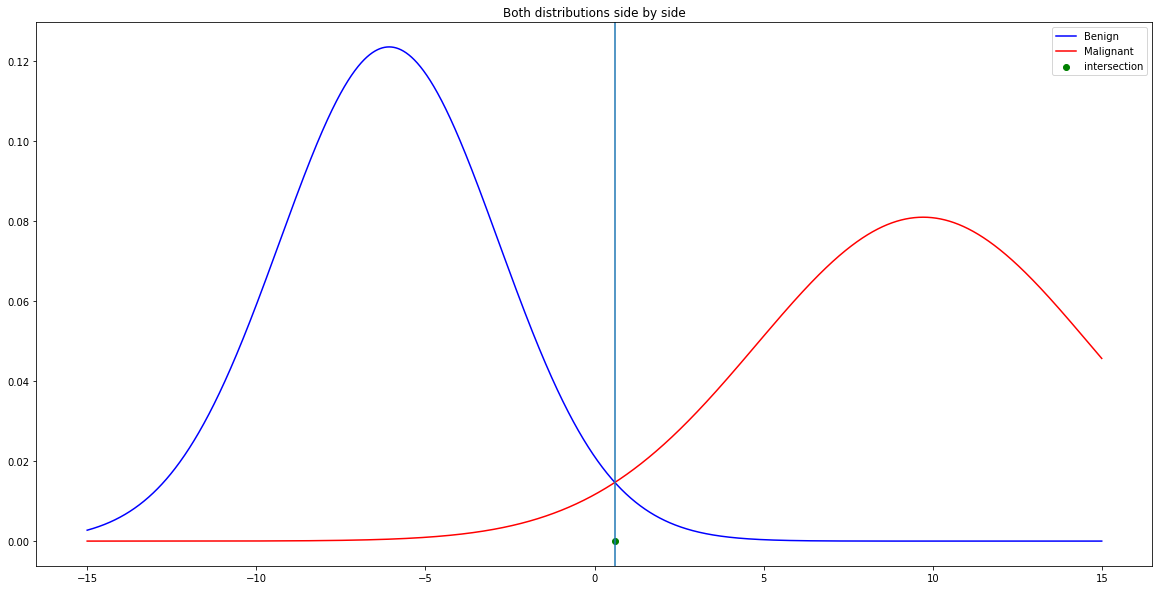

0.9893899204244032,0.9516129032258065
Threshold of FLDM2:  0.5979925465107234


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


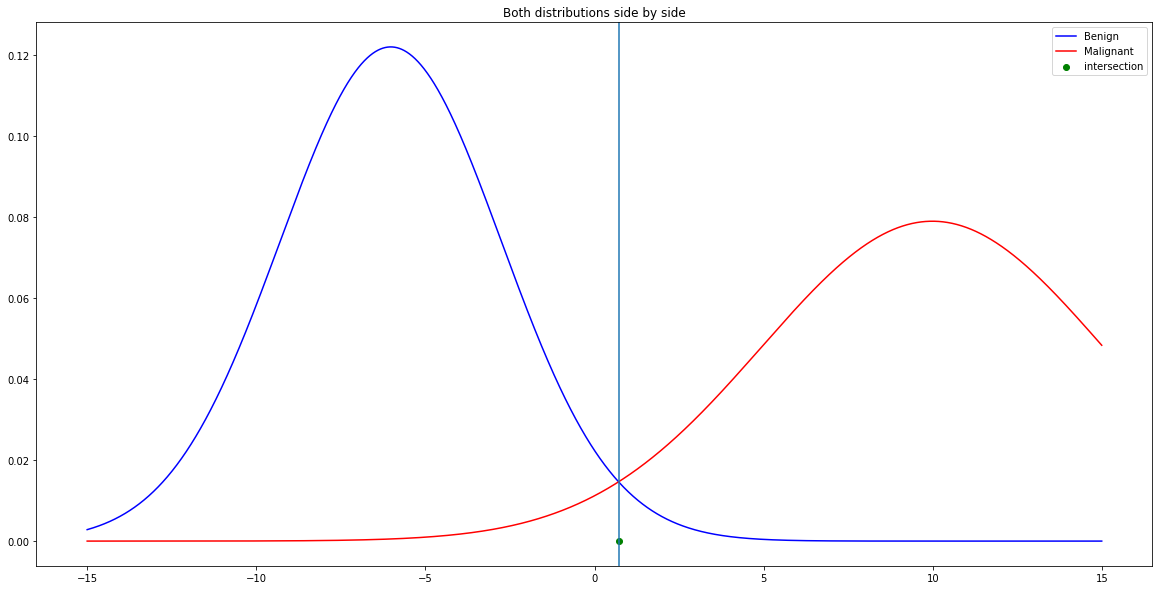

0.9761273209549072,0.9731182795698925
Threshold of FLDM2:  0.7084346223386713


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


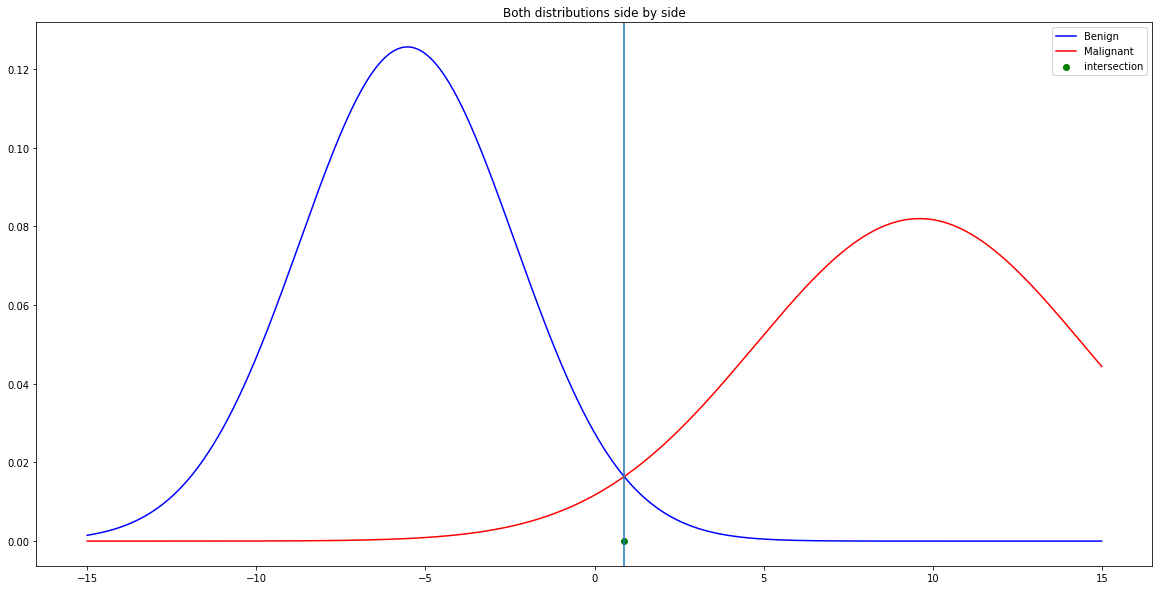

0.9787798408488063,0.956989247311828
Threshold of FLDM2:  0.8726460927051805


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


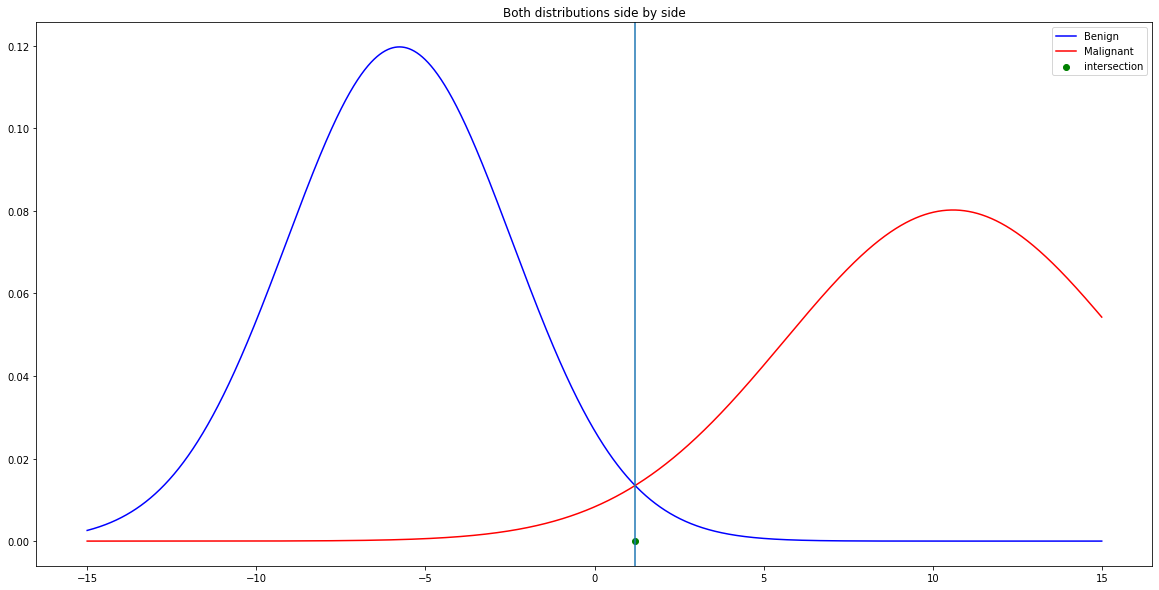

0.9814323607427056,0.9516129032258065
Threshold of FLDM2:  1.196797436455078


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


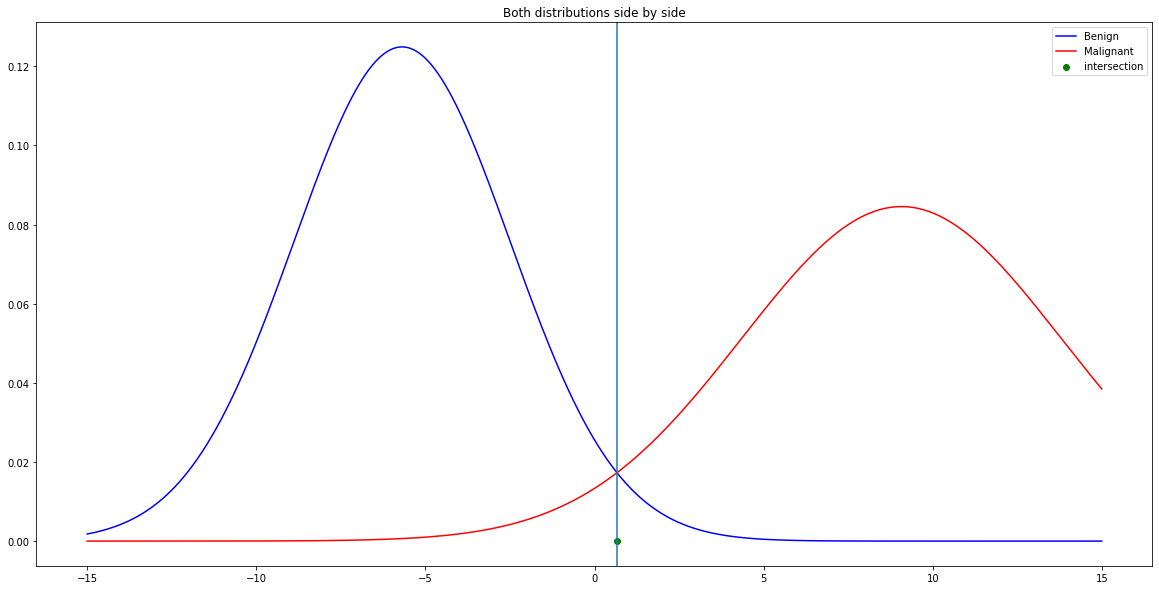

0.9734748010610079,0.956989247311828
Threshold of FLDM2:  0.6602765706261069


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


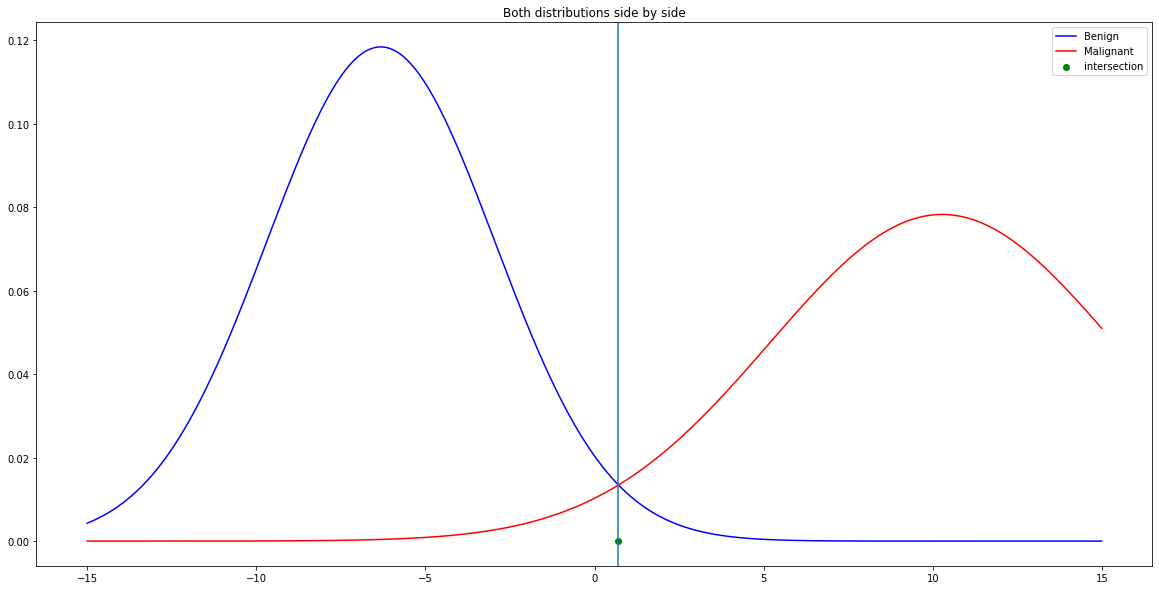

0.9787798408488063,0.9731182795698925
Threshold of FLDM2:  0.7053616303372577


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


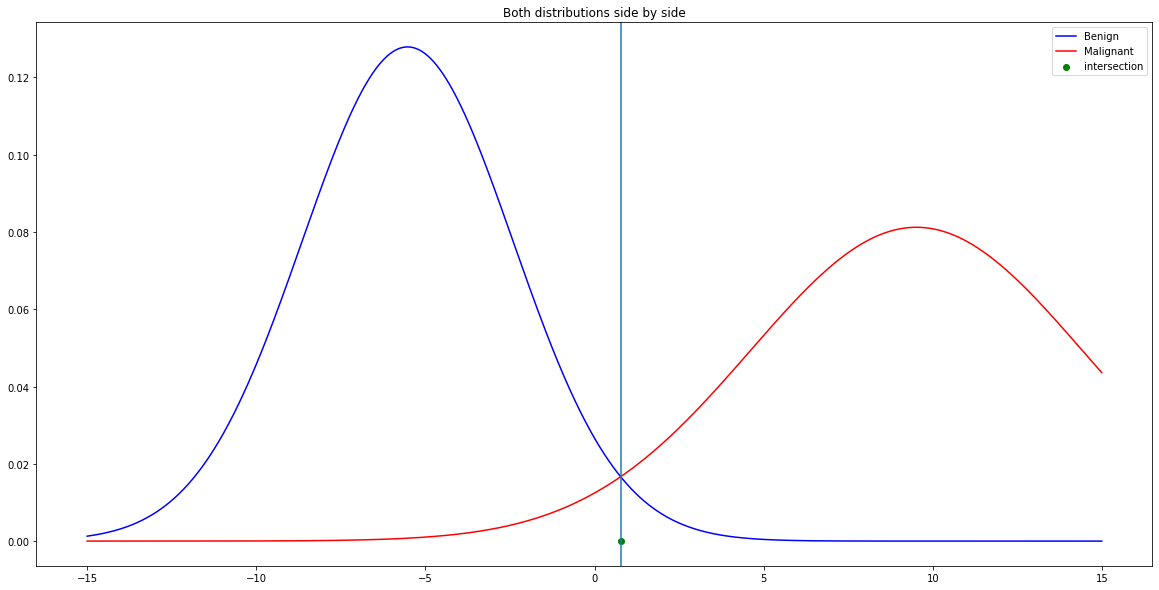

0.9681697612732095,0.9731182795698925
Threshold of FLDM2:  0.7692287991221417


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


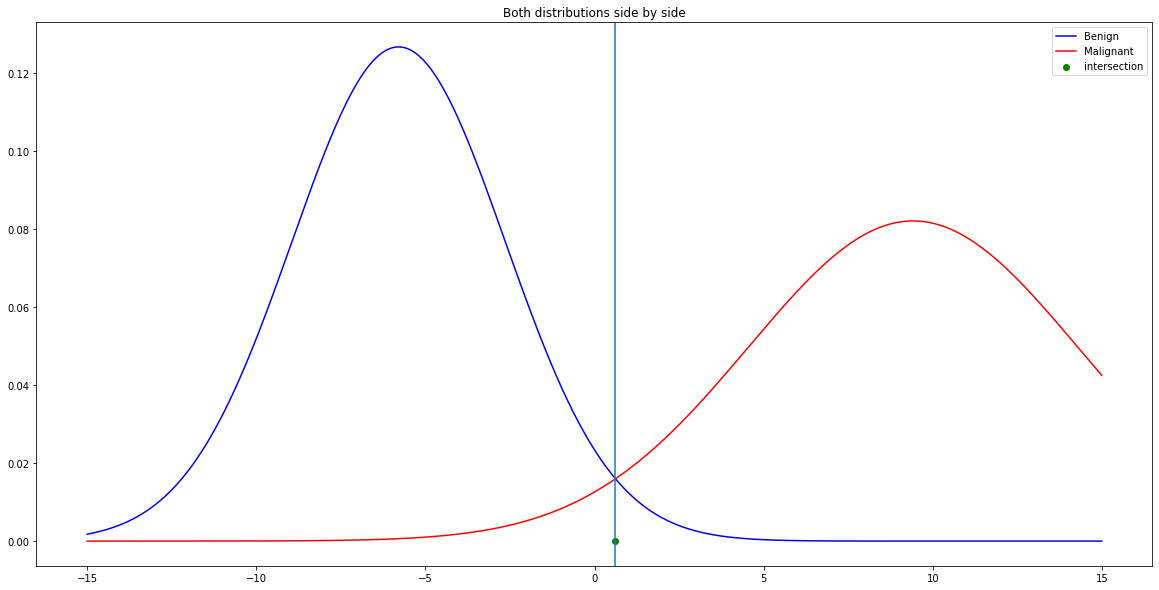

0.9814323607427056,0.978494623655914
Threshold of FLDM2:  0.6161368837008577


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


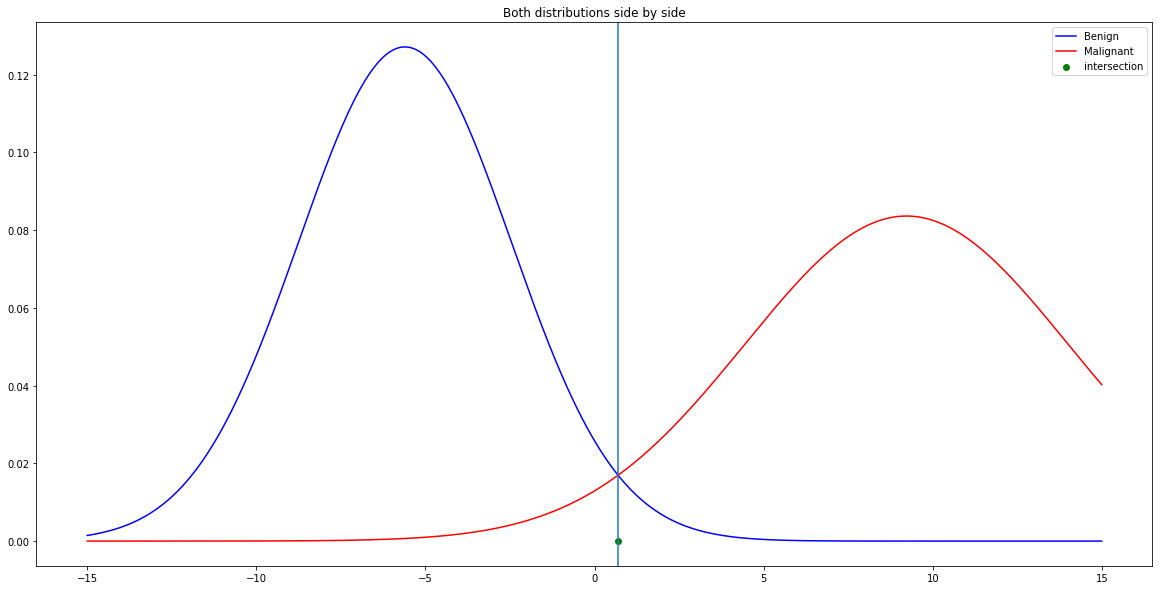

0.9787798408488063,0.9731182795698925
Threshold of FLDM2:  0.6932853158708119
Average training accuracy of FLDM2:  0.9779840848806366
Average training precision of FLDM2:  0.9779694592513349
Average training recall of FLDM2:  0.961802934909384
Average testing accuracy of FLDM2:  0.9655913978494622
Average testing precision of FLDM2:  0.9679532668001187
Average testing recall of FLDM2:  0.9428276909709421


In [ ]:
#FLDM2
df=pd.read_csv("Dsata Set for Assignment 1.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)
print("Batch Training Accuracy,Batch Testing Accuracy")
sum_accuracy2=0
sum_precision2=0
sum_recall2=0
sum_accuracy_train2=0
sum_precision_train2=0
sum_recall_train2=0
features_list = pd.Series(["radius_mean",	"texture_mean",	"perimeter_mean",	"area_mean",	"smoothness_mean",	"compactness_mean",	"concavity_mean",	"concave points_mean",	"symmetry_mean",	"fractal_dimension_mean",	"radius_se",	"texture_se",	"perimeter_se",	"area_se",	"smoothness_se",	"compactness_se",	"concavity_se",	"concave points_se",	"symmetry_se",	"fractal_dimension_se",	"radius_worst",	"texture_worst",	"perimeter_worst",	"area_worst",	"smoothness_worst",	"compactness_worst",	"concavity_worst",	"concave points_worst",	"symmetry_worst",	"fractal_dimension_worst"])
features_list = features_list.sample(frac=1)
features_list=features_list.tolist()
features_list.insert(0,"diagnosis")
df=df[features_list]
for i in range(10):

    X_train,X_test,y_train,y_test=data_split(df)
    w=find_vector(X_train,y_train)
    threshold,m,s=generate_threshold(df,X_train,y_train,w)
    plot_onedim(m,s)
    accuracy,precision,recall=evaluate_total(X_test,y_test,w, threshold)
    sum_accuracy2+=accuracy
    sum_precision2+=precision
    sum_recall2+=recall
    training_accuracy,training_precision,training_recall=evaluate_total(X_train,y_train,w, threshold)
    sum_accuracy_train2+=training_accuracy
    sum_precision_train2+=training_precision
    sum_recall_train2+=training_recall
    print(str(training_accuracy)+","+str(accuracy))
    print("Threshold of FLDM2: ",threshold)
avg_accuracy2=sum_accuracy2/10
avg_accuracy_train2=sum_accuracy_train2/10
avg_precision_train2=sum_precision_train2/10
avg_recall_train2=sum_recall_train2/10
avg_precision2=sum_precision2/10
avg_recall2=sum_recall2/10
print("Average training accuracy of FLDM2: ",avg_accuracy_train2)
print("Average training precision of FLDM2: ",avg_precision_train2)
print("Average training recall of FLDM2: ",avg_recall_train2)
print("Average testing accuracy of FLDM2: ",avg_accuracy2)
print("Average testing precision of FLDM2: ",avg_precision2)
print("Average testing recall of FLDM2: ",avg_recall2)


In [ ]:
print("Average accuracy of FLDM1: ",avg_accuracy)
print("Average accuracy of FLDM2: ",avg_accuracy2)

Average accuracy of FLDM1:  0.9650537634408602
Average accuracy of FLDM2:  0.9655913978494622


In [ ]:
print("Average precision of FLDM1: ",avg_precision)
print("Average precision of FLDM2: ",avg_precision2)

Average precision of FLDM1:  0.9642739835455434
Average precision of FLDM2:  0.9679532668001187


In [ ]:
print("Average recall of FLDM1: ",avg_recall)
print("Average recall of FLDM2: ",avg_recall2)

Average recall of FLDM1:  0.9436716349451808
Average recall of FLDM2:  0.9428276909709421


## **Part C – Logistic Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dsata Set for Assignment 1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,568.000000,569.000000,568.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,567.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.116125,19.289649,92.023468,654.889104,0.096360,0.104341,0.088925,0.048919,0.181162,...,16.269190,25.677223,107.261213,881.402469,0.132369,0.254265,0.272455,0.114606,0.290076,0.083946
std,1.250206e+08,3.517065,4.301036,24.285650,351.914129,0.014064,0.052813,0.079734,0.038803,0.027414,...,4.833242,6.146258,33.602542,570.185385,0.022832,0.157336,0.208711,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.697500,16.170000,75.200000,420.300000,0.086370,0.064920,0.029575,0.020310,0.161900,...,13.010000,21.080000,84.110000,514.650000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460
50%,9.060240e+05,13.355000,18.840000,86.290000,551.100000,0.095870,0.092630,0.061545,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.227450,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.150000,782.700000,0.105300,0.130400,0.131000,0.074000,0.195700,...,18.790000,29.720000,125.400000,1086.000000,0.146000,0.339100,0.383500,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.drop(['id'], inplace = True, axis = 1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

In [ ]:
def cost(x, y, w):
  m = len(y)
  pred = sigmoid(x.dot(w))
  return -np.sum((y*np.log(pred)) + ((1-y)*np.log(1-pred)))/(m)

In [ ]:
def get_pred(pred, alpha):
  if pred > alpha:
    return 1
  else:
    return 0

In [ ]:
def get_metrics(y_true, y_pred, alpha):
  tp, tn, fp, fn = 0, 0, 0, 0
  metric_val = dict()
  for i in range(y_pred.shape[0]):
    pred = get_pred(y_pred[i], alpha)
    if(pred == 1 and y_true[i] == 1):
      tp+=1
    elif(pred == 0 and y_true[i] == 0):
      tn+=1
    elif(pred == 1 and y_true[i] == 0):
      fp+=1
    elif(pred == 0 and y_true[i] == 1):
      fn+=1
  accuracy = (tp + tn)/len(y_true)
  recall = tp/(tp + fn)
  precision = tp/(tp + fp)
  metric_val['Total'] = len(y_true)
  metric_val['TP'] = tp
  metric_val['TN'] = tn
  metric_val['FP'] = fp
  metric_val['FN'] = fn
  metric_val['Recall'] = recall
  metric_val['Precision'] = precision
  metric_val['Accuracy'] = accuracy
  return metric_val

In [ ]:
def plot_confusion_matrix(metrics):
  fig, ax = plt.subplots()
  classes = ['Malignant', 'Benign']
  t = metrics['Total']
  report = np.array([[metrics['TP']/t, metrics['FN']/t], [metrics['FP']/t, metrics['TN']/t]])
  im = ax.imshow(report, cmap = 'Blues')
  ax.set_xticks(np.arange(len(classes)))
  ax.set_yticks(np.arange(len(classes)))
  ax.set_xticklabels(classes)
  ax.set_yticklabels(classes)
  plt.setp(ax.get_xticklabels(), rotation_mode="anchor")      
  group_names = ['TP','FN','FP','TN']
  group_percentages = ['{0:.2%}'.format(value) for value in report.flatten()]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  for i in range(len(classes)):
    for j in range(len(classes)):
      text = ax.text(j, i, labels[i, j], ha="center", va="center")
  ax.set_title('Confusion Matrix', fontdict = {'size':18}, pad = 20)
  fig.tight_layout()
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
  plt.show()

In [ ]:
def get_average_metrics(metrics, k=10):
  tp, tn, fp, fn, total, acc, prec, rec = 0, 0, 0, 0, 0, 0, 0, 0
  for metric in metrics:
    tp += metric['TP']
    tn += metric['TN']
    fp += metric['FP']
    fn += metric['FN']
    total += metric['Total']
    acc += metric['Accuracy']
    prec += metric['Precision']
    rec += metric['Recall']
  average_metrics = dict()
  average_metrics['TP'] = tp/k
  average_metrics['TN'] = tn/k
  average_metrics['FP'] = fp/k
  average_metrics['FN'] = fn/k
  average_metrics['Total'] = total/k
  average_metrics['Accuracy'] = acc/k
  average_metrics['Precision'] = prec/k
  average_metrics['Recall'] = rec/k
  return average_metrics

In [ ]:
R = np.random.RandomState(40)
w = R.randn(3, 1)
X = np.array([[2, 1, 2], [3, 4, 3], [4, 3, 5], [5, 3, 1]])
y = np.array([1, 0, 0, 1]).reshape(4, 1)
print(cost(X, y, w))

1.7266029078363554


In [ ]:
np.arange(0, X.shape[0], 6)

array([0])

In [ ]:
def batch_grad(x, y, w, alpha, iters):
  m = len(y)
  temp = 0
  history = np.zeros((iters, 1))
  for i in range(iters):
    history[i] = cost(x, y, w)
    for j in range(len(w)):
      w[j] = w[j] - alpha*(np.sum(np.multiply((sigmoid(x.dot(w)) - y).reshape(1, m), x[:, j])))/m
    # if i%100 == 0 and not np.isnan(history[i][0]):
    #   print("Cost at iteration: {}, {}".format(i, history[i][0]))
    #   temp+=1
  print("Cost at iteration: {}, {}".format(iters, history[iters-1][0]))
  return w, history

In [ ]:
def stochastic_grad(x, y, w, alpha, iters):
  m = len(y)
  temp = 0
  history = np.zeros((iters, 1))
  for i in range(iters):
    history[i] = cost(x, y, w)
    num = np.random.randint(0, x.shape[0])
    x_val = x[num, :].reshape(1, -1)
    y_val = y[num]
    for j in range(len(w)):
      w[j] = w[j] - alpha*(np.multiply((sigmoid(x_val.dot(w)) - y_val).reshape(1, 1), x_val[:,j]))
    # if i%100 == 0 and not np.isnan(history[i][0]):
    #   print("Cost at iteration: {}, {}".format(i, history[i][0]))
    #   temp+=1
  print("Cost at iteration: {}, {}".format(iters, history[iters-1][0]))
  return w, history

In [ ]:
def minibatch_grad(x, y, w, alpha, iters, batch_size = 10):
  temp = 0
  history = np.zeros((iters, 1))
  for i in range(iters):
    history[i] = cost(x, y, w)
    batch = np.arange(0, x.shape[0], batch_size)
    np.random.shuffle(batch)
    m = batch.shape[0]
    x_batch = x[batch, :]
    y_batch = y[batch]
    for j in range(len(w)):
      w[j] = w[j] - alpha*(np.sum(np.multiply((sigmoid(x_batch.dot(w)) - y_batch).reshape(1, m), x_batch[:, j])))/m
    # if i%100 == 0 and not np.isnan(history[i][0]):
    #   print("Cost at iteration: {}, {}".format(i, history[i][0]))
    #   temp+=1
  print("Cost at iteration: {}, {}".format(iters, history[iters-1][0]))
  return w, history

In [ ]:
#For Part C Learning Task 1
df.isna().sum()
df1 = df.dropna()

In [ ]:
#Part C Learning Task 1
learning_rates = [0.01, 0.001, 0.0001]
lrbatchtrain_metrics, lrbatchtest_metrics = list(), list()
lrstochastictrain_metrics, lrstochastictest_metrics = list(), list()
lrminibatchtrain_metrics, lrminibatchtest_metrics = list(), list()
R = np.random.RandomState(20)
for lr in learning_rates:
  batchtrain_metrics, batchtest_metrics = list(), list()
  stochastictrain_metrics, stochastictest_metrics = list(), list()
  minibatchtrain_metrics, minibatchtest_metrics = list(), list()
  for i in range(10):
    df_train = df1.sample(frac = 0.67)
    df_test = df1.drop(df_train.index)
    xtrain, xtest = df_train.drop(['diagnosis'], axis = 1).to_numpy(), df_test.drop(['diagnosis'], axis = 1).to_numpy()
    ytrain, ytest = df_train['diagnosis'].to_numpy().reshape(-1, 1), df_test['diagnosis'].to_numpy().reshape(-1, 1)
    xtrain = np.c_[np.ones((xtrain.shape[0], 1)), xtrain]
    xtest = np.c_[np.ones((xtest.shape[0], 1)), xtest]
    w = R.randn(xtrain.shape[1], 1)*0.01
    print("====== Batch Gradient Descent {}, learning rate {} ======".format(i, lr))
    w, his1 = batch_grad(xtrain, ytrain, w, lr, 2000)
    y_predtrain = sigmoid(xtrain.dot(w))
    y_predtest = sigmoid(xtest.dot(w))
    train_metrics = get_metrics(ytrain, y_predtrain, 0.5)
    test_metrics = get_metrics(ytest, y_predtest, 0.5)
    print("Accuracy for threshold = 0.3: {}".format(get_metrics(ytest, y_predtest, 0.3)['Accuracy']))
    print("Accuracy for threshold = 0.4: {}".format(get_metrics(ytest, y_predtest, 0.4)['Accuracy']))
    print("Accuracy for threshold = 0.6: {}".format(get_metrics(ytest, y_predtest, 0.6)['Accuracy']))
    print("Accuracy for threshold = 0.7: {}".format(get_metrics(ytest, y_predtest, 0.7)['Accuracy']))
    batchtrain_metrics.append(train_metrics)
    batchtest_metrics.append(test_metrics)
    # print("Training metrics and Testing metrics: {}\n  {}".format(train_metrics, test_metrics))
    print("Batch Gradient Descent Done")
    w = R.randn(xtrain.shape[1], 1)*0.01
    print("====== Stochastic Gradient Descent {}, learning rate {} ======".format(i, lr))
    w, his2 = stochastic_grad(xtrain, ytrain, w, lr, 2000)
    y_predtrain = sigmoid(xtrain.dot(w))
    y_predtest = sigmoid(xtest.dot(w))
    train_metrics = get_metrics(ytrain, y_predtrain, 0.5)
    test_metrics = get_metrics(ytest, y_predtest, 0.5)
    print("Accuracy for threshold = 0.3: {}".format(get_metrics(ytest, y_predtest, 0.3)['Accuracy']))
    print("Accuracy for threshold = 0.4: {}".format(get_metrics(ytest, y_predtest, 0.4)['Accuracy']))
    print("Accuracy for threshold = 0.6: {}".format(get_metrics(ytest, y_predtest, 0.6)['Accuracy']))
    print("Accuracy for threshold = 0.7: {}".format(get_metrics(ytest, y_predtest, 0.7)['Accuracy']))
    stochastictrain_metrics.append(train_metrics)
    stochastictest_metrics.append(test_metrics)
    # plot_confusion_matrix(metrics)
    # print("Training metrics and Testing metrics: {}\n  {}".format(train_metrics, test_metrics))
    print("Stochastic Gradient Descent Done")
    w = R.randn(xtrain.shape[1], 1)*0.01
    print("====== Mini Batch Gradient Descent {}, learning rate {} ======".format(i, lr))
    w, his3 = minibatch_grad(xtrain, ytrain, w, lr, 2000, 10)
    y_predtrain = sigmoid(xtrain.dot(w))
    y_predtest = sigmoid(xtest.dot(w))
    train_metrics = get_metrics(ytrain, y_predtrain, 0.5)
    test_metrics = get_metrics(ytest, y_predtest, 0.5)
    print("Accuracy for threshold = 0.3: {}".format(get_metrics(ytest, y_predtest, 0.3)['Accuracy']))
    print("Accuracy for threshold = 0.4: {}".format(get_metrics(ytest, y_predtest, 0.4)['Accuracy']))
    print("Accuracy for threshold = 0.6: {}".format(get_metrics(ytest, y_predtest, 0.6)['Accuracy']))
    print("Accuracy for threshold = 0.7: {}".format(get_metrics(ytest, y_predtest, 0.7)['Accuracy']))
    minibatchtrain_metrics.append(train_metrics)
    minibatchtest_metrics.append(test_metrics)
    # print("Training metrics and Testing metrics: {}\n  {}".format(train_metrics, test_metrics))
    print("Mini Batch Gradient Descent Done")
  print("Batch Average Train and Test Metrics: {}\n {}".format(get_average_metrics(batchtrain_metrics), get_average_metrics(batchtest_metrics)))
  print("Stochastic Average Train and Test Metrics: {}\n {}".format(get_average_metrics(stochastictrain_metrics), get_average_metrics(stochastictest_metrics)))
  print("Mini Batch Average Train and Test Metrics: {}\n {}".format(get_average_metrics(minibatchtrain_metrics), get_average_metrics(minibatchtest_metrics)))
  lrbatchtrain_metrics.append(batchtrain_metrics)
  lrbatchtest_metrics.append(batchtest_metrics)
  lrstochastictrain_metrics.append(stochastictrain_metrics)
  lrstochastictest_metrics.append(stochastictest_metrics)
  lrminibatchtrain_metrics.append(minibatchtrain_metrics)
  lrminibatchtest_metrics.append(minibatchtest_metrics)

====== Batch Gradient Descent 0, learning rate 0.01 ======
Cost at iteration: 2000, nan
Accuracy for threshold = 0.3: 0.9139784946236559
Accuracy for threshold = 0.4: 0.9139784946236559
Accuracy for threshold = 0.6: 0.9139784946236559
Accuracy for threshold = 0.7: 0.9139784946236559
Batch Gradient Descent Done
====== Stochastic Gradient Descent 0, learning rate 0.01 ======
Cost at iteration: 2000, nan
Accuracy for threshold = 0.3: 0.5752688172043011
Accuracy for threshold = 0.4: 0.5752688172043011
Accuracy for threshold = 0.6: 0.5752688172043011
Accuracy for threshold = 0.7: 0.5752688172043011
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 0, learning rate 0.01 ======
Cost at iteration: 2000, nan
Accuracy for threshold = 0.3: 0.9139784946236559
Accuracy for threshold = 0.4: 0.9139784946236559
Accuracy for threshold = 0.6: 0.9139784946236559
Accuracy for threshold = 0.7: 0.9139784946236559
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 1, learning ra

In [ ]:
#Batch, Stochastic, Mini Batch Testing and Training Accuracies
for i, lr in zip(range(3), learning_rates):
  print("{}\n".format(lr))
  print("Batch Training Accuracy,Batch Testing Accuracy")
  for m1, m2 in zip(lrbatchtrain_metrics[i], lrbatchtest_metrics[i]):
    print("{},{}".format(m1['Accuracy'], m2['Accuracy']))
  print("\nStochastic Training Accuracy,Stochastic Testing Accuracy")
  for m1, m2 in zip(lrstochastictrain_metrics[i], lrstochastictest_metrics[i]):
    print("{},{}".format(m1['Accuracy'], m2['Accuracy']))
  print("\nMini Batch Training Accuracy,Mini Batch Testing Accuracy")
  for m1, m2 in zip(lrminibatchtrain_metrics[i], lrminibatchtest_metrics[i]):
    print("{},{}".format(m1['Accuracy'], m2['Accuracy']))
  print("\n")

In [ ]:
# For Part C Learning Task 2 Feature Engineering 1
df.isna().sum()
for col in df.columns[1:]:
  df[col] = df[col].fillna(df[col].mean())
df.isna().sum().sum() #Gives 0

0

In [ ]:
# For Part C Learning Task 2 Feature Engineering 2
for col in df.columns[1:]:
  df[col] = (df[col] - df[col].mean())/df[col].std()

====== Batch Gradient Descent 0, learning rate 0.01 ======
Cost at iteration: 2000, 0.09303912473519182


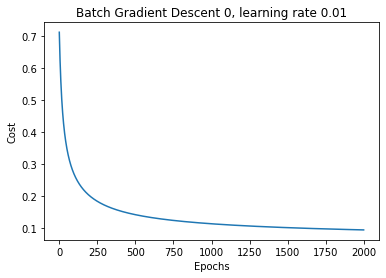

Accuracy for threshold = 0.3: 0.9680851063829787
Accuracy for threshold = 0.4: 0.973404255319149
Accuracy for threshold = 0.6: 0.9787234042553191
Accuracy for threshold = 0.7: 0.973404255319149
Batch Gradient Descent Done
====== Stochastic Gradient Descent 0, learning rate 0.01
Cost at iteration: 2000, 0.09524021045849522


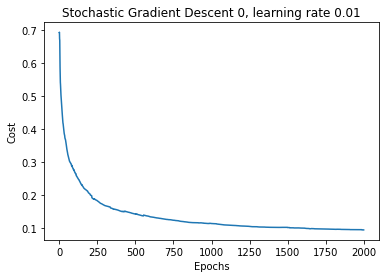

Accuracy for threshold = 0.3: 0.9627659574468085
Accuracy for threshold = 0.4: 0.973404255319149
Accuracy for threshold = 0.6: 0.973404255319149
Accuracy for threshold = 0.7: 0.9680851063829787
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 0, learning rate 0.01 ======
Cost at iteration: 2000, 0.11852939083020853


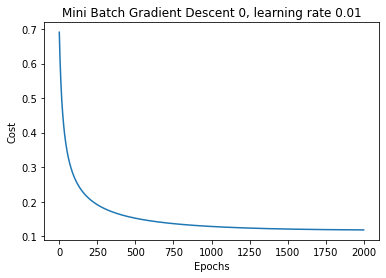

Accuracy for threshold = 0.3: 0.9468085106382979
Accuracy for threshold = 0.4: 0.9574468085106383
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9574468085106383
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 1, learning rate 0.01 ======
Cost at iteration: 2000, 0.06151648316661075


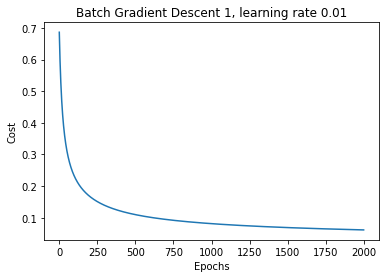

Accuracy for threshold = 0.3: 0.9095744680851063
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9521276595744681
Batch Gradient Descent Done
====== Stochastic Gradient Descent 1, learning rate 0.01
Cost at iteration: 2000, 0.06320028549832352


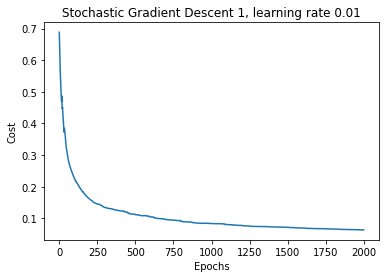

Accuracy for threshold = 0.3: 0.9148936170212766
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9468085106382979
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 1, learning rate 0.01 ======
Cost at iteration: 2000, 0.08421039555283717


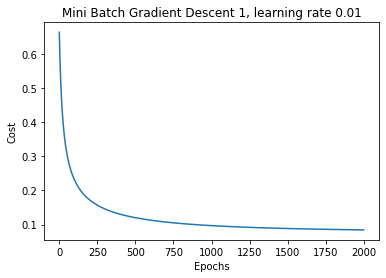

Accuracy for threshold = 0.3: 0.9202127659574468
Accuracy for threshold = 0.4: 0.9095744680851063
Accuracy for threshold = 0.6: 0.9148936170212766
Accuracy for threshold = 0.7: 0.9042553191489362
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 2, learning rate 0.01 ======
Cost at iteration: 2000, 0.0899880792317527


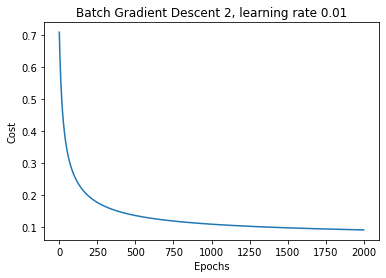

Accuracy for threshold = 0.3: 0.9574468085106383
Accuracy for threshold = 0.4: 0.973404255319149
Accuracy for threshold = 0.6: 0.973404255319149
Accuracy for threshold = 0.7: 0.9468085106382979
Batch Gradient Descent Done
====== Stochastic Gradient Descent 2, learning rate 0.01
Cost at iteration: 2000, 0.09011766562431278


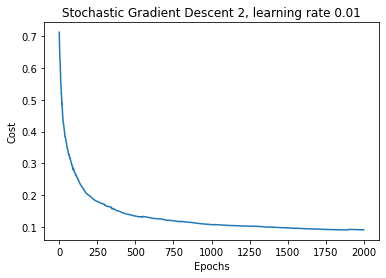

Accuracy for threshold = 0.3: 0.9627659574468085
Accuracy for threshold = 0.4: 0.973404255319149
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9627659574468085
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 2, learning rate 0.01 ======
Cost at iteration: 2000, 0.12877862355502023


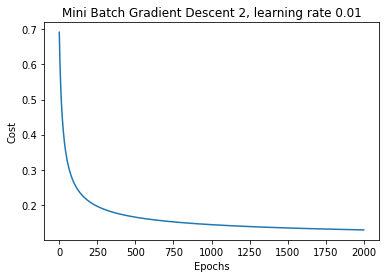

Accuracy for threshold = 0.3: 0.9361702127659575
Accuracy for threshold = 0.4: 0.9521276595744681
Accuracy for threshold = 0.6: 0.9414893617021277
Accuracy for threshold = 0.7: 0.9308510638297872
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 3, learning rate 0.01 ======
Cost at iteration: 2000, 0.09392833976401199


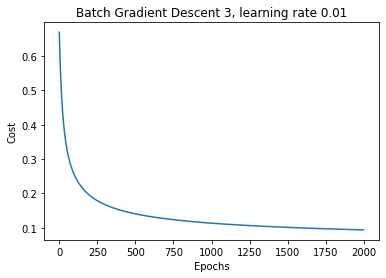

Accuracy for threshold = 0.3: 0.9840425531914894
Accuracy for threshold = 0.4: 0.9946808510638298
Accuracy for threshold = 0.6: 0.9840425531914894
Accuracy for threshold = 0.7: 0.973404255319149
Batch Gradient Descent Done
====== Stochastic Gradient Descent 3, learning rate 0.01
Cost at iteration: 2000, 0.09540849971413325


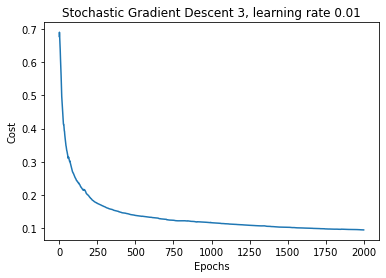

Accuracy for threshold = 0.3: 0.9787234042553191
Accuracy for threshold = 0.4: 0.9946808510638298
Accuracy for threshold = 0.6: 0.9787234042553191
Accuracy for threshold = 0.7: 0.973404255319149
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 3, learning rate 0.01 ======
Cost at iteration: 2000, 0.1397451815065993


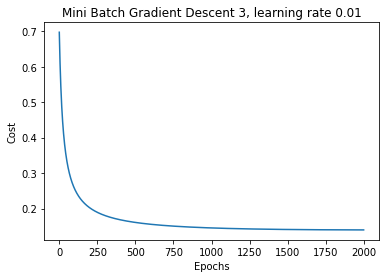

Accuracy for threshold = 0.3: 0.9414893617021277
Accuracy for threshold = 0.4: 0.973404255319149
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9574468085106383
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 4, learning rate 0.01 ======
Cost at iteration: 2000, 0.09217941892463712


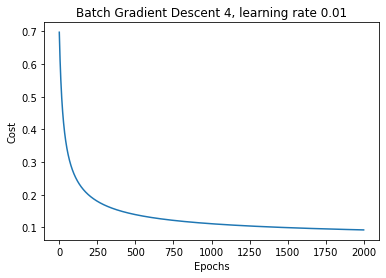

Accuracy for threshold = 0.3: 0.9680851063829787
Accuracy for threshold = 0.4: 0.9680851063829787
Accuracy for threshold = 0.6: 0.973404255319149
Accuracy for threshold = 0.7: 0.9680851063829787
Batch Gradient Descent Done
====== Stochastic Gradient Descent 4, learning rate 0.01
Cost at iteration: 2000, 0.09257887612892783


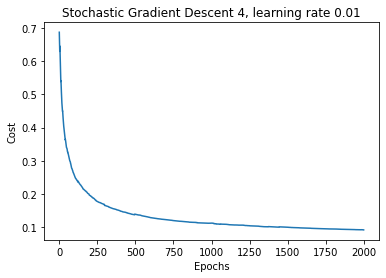

Accuracy for threshold = 0.3: 0.9680851063829787
Accuracy for threshold = 0.4: 0.9840425531914894
Accuracy for threshold = 0.6: 0.973404255319149
Accuracy for threshold = 0.7: 0.9680851063829787
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 4, learning rate 0.01 ======
Cost at iteration: 2000, 0.1061464500797453


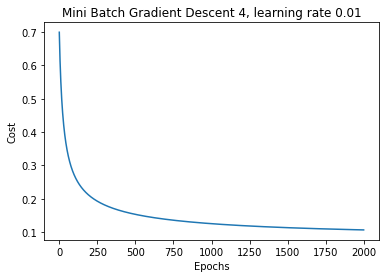

Accuracy for threshold = 0.3: 0.9468085106382979
Accuracy for threshold = 0.4: 0.9574468085106383
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.973404255319149
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 5, learning rate 0.01 ======
Cost at iteration: 2000, 0.08500362928767119


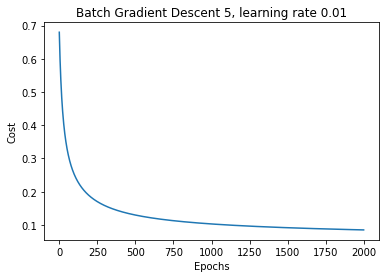

Accuracy for threshold = 0.3: 0.9574468085106383
Accuracy for threshold = 0.4: 0.9680851063829787
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9521276595744681
Batch Gradient Descent Done
====== Stochastic Gradient Descent 5, learning rate 0.01
Cost at iteration: 2000, 0.08425847507022795


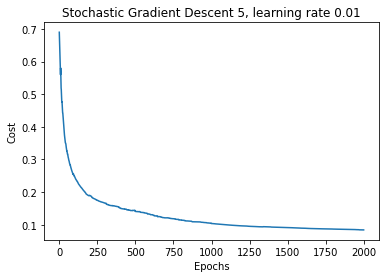

Accuracy for threshold = 0.3: 0.9574468085106383
Accuracy for threshold = 0.4: 0.9627659574468085
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9574468085106383
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 5, learning rate 0.01 ======
Cost at iteration: 2000, 0.09094367183193096


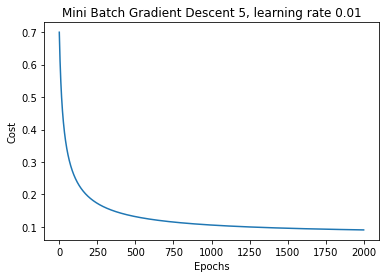

Accuracy for threshold = 0.3: 0.9574468085106383
Accuracy for threshold = 0.4: 0.9574468085106383
Accuracy for threshold = 0.6: 0.9414893617021277
Accuracy for threshold = 0.7: 0.9468085106382979
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 6, learning rate 0.01 ======
Cost at iteration: 2000, 0.09321660828990556


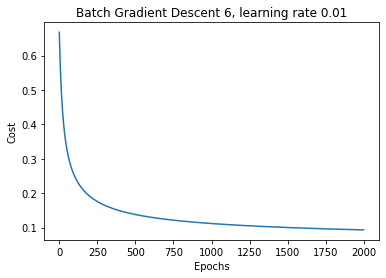

Accuracy for threshold = 0.3: 0.9787234042553191
Accuracy for threshold = 0.4: 0.9840425531914894
Accuracy for threshold = 0.6: 0.973404255319149
Accuracy for threshold = 0.7: 0.973404255319149
Batch Gradient Descent Done
====== Stochastic Gradient Descent 6, learning rate 0.01
Cost at iteration: 2000, 0.0936751304105424


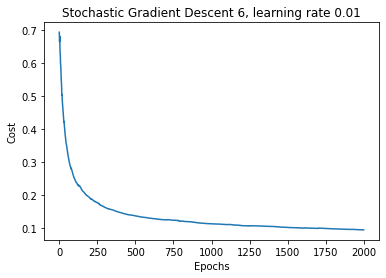

Accuracy for threshold = 0.3: 0.9787234042553191
Accuracy for threshold = 0.4: 0.9840425531914894
Accuracy for threshold = 0.6: 0.973404255319149
Accuracy for threshold = 0.7: 0.973404255319149
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 6, learning rate 0.01 ======
Cost at iteration: 2000, 0.12740124648804838


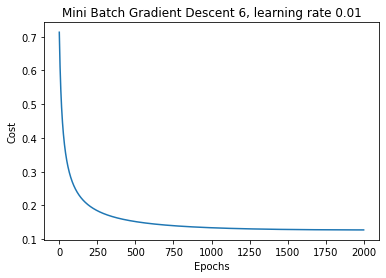

Accuracy for threshold = 0.3: 0.9361702127659575
Accuracy for threshold = 0.4: 0.9574468085106383
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9521276595744681
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 7, learning rate 0.01 ======
Cost at iteration: 2000, 0.08713307093144569


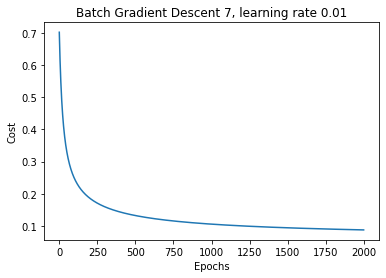

Accuracy for threshold = 0.3: 0.9787234042553191
Accuracy for threshold = 0.4: 0.9840425531914894
Accuracy for threshold = 0.6: 0.9468085106382979
Accuracy for threshold = 0.7: 0.9308510638297872
Batch Gradient Descent Done
====== Stochastic Gradient Descent 7, learning rate 0.01
Cost at iteration: 2000, 0.08728907915417417


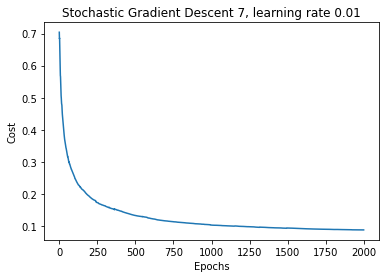

Accuracy for threshold = 0.3: 0.9840425531914894
Accuracy for threshold = 0.4: 0.9840425531914894
Accuracy for threshold = 0.6: 0.9468085106382979
Accuracy for threshold = 0.7: 0.9308510638297872
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 7, learning rate 0.01 ======
Cost at iteration: 2000, 0.11114459146949311


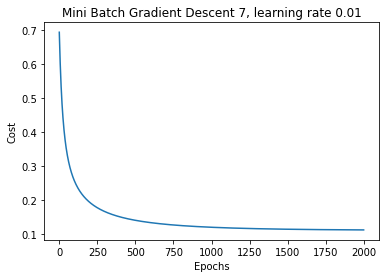

Accuracy for threshold = 0.3: 0.973404255319149
Accuracy for threshold = 0.4: 0.9521276595744681
Accuracy for threshold = 0.6: 0.9202127659574468
Accuracy for threshold = 0.7: 0.9095744680851063
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 8, learning rate 0.01 ======
Cost at iteration: 2000, 0.08001673689808145


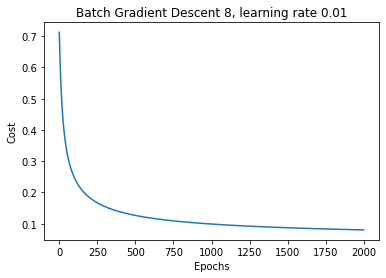

Accuracy for threshold = 0.3: 0.9627659574468085
Accuracy for threshold = 0.4: 0.9680851063829787
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9521276595744681
Batch Gradient Descent Done
====== Stochastic Gradient Descent 8, learning rate 0.01
Cost at iteration: 2000, 0.08256265472063293


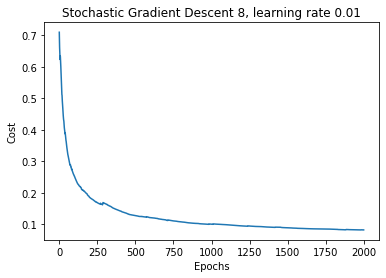

Accuracy for threshold = 0.3: 0.9574468085106383
Accuracy for threshold = 0.4: 0.9680851063829787
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9468085106382979
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 8, learning rate 0.01 ======
Cost at iteration: 2000, 0.1060139994167391


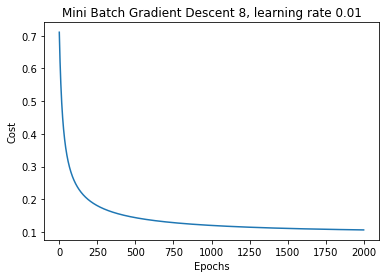

Accuracy for threshold = 0.3: 0.9414893617021277
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9468085106382979
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 9, learning rate 0.01 ======
Cost at iteration: 2000, 0.08246325593060554


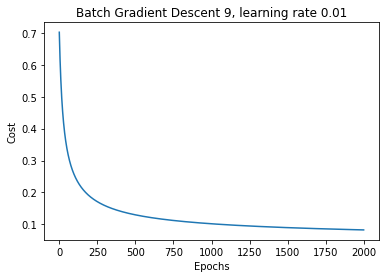

Accuracy for threshold = 0.3: 0.973404255319149
Accuracy for threshold = 0.4: 0.9840425531914894
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9468085106382979
Batch Gradient Descent Done
====== Stochastic Gradient Descent 9, learning rate 0.01
Cost at iteration: 2000, 0.08321726042437042


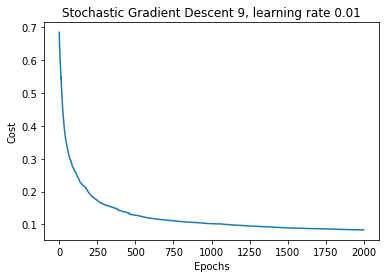

Accuracy for threshold = 0.3: 0.9680851063829787
Accuracy for threshold = 0.4: 0.9680851063829787
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9414893617021277
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 9, learning rate 0.01 ======
Cost at iteration: 2000, 0.09148510528407855


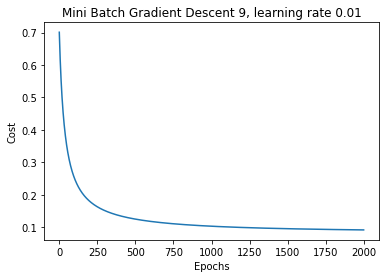

Accuracy for threshold = 0.3: 0.9680851063829787
Accuracy for threshold = 0.4: 0.9627659574468085
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9414893617021277
Mini Batch Gradient Descent Done
Batch Average Train and Test Metrics: {'TP': 136.1, 'TN': 238.3, 'FP': 1.7, 'FN': 4.9, 'Total': 381.0, 'Accuracy': 0.9826771653543307, 'Precision': 0.9876966159983738, 'Recall': 0.9652779839188039}
 {'TP': 68.4, 'TN': 115.7, 'FP': 1.3, 'FN': 2.6, 'Total': 188.0, 'Accuracy': 0.9792553191489363, 'Precision': 0.981657977430585, 'Recall': 0.9637303673925695}
Stochastic Average Train and Test Metrics: {'TP': 135.7, 'TN': 238.2, 'FP': 1.8, 'FN': 5.3, 'Total': 381.0, 'Accuracy': 0.9813648293963254, 'Precision': 0.9869707691697436, 'Recall': 0.9624493221062453}
 {'TP': 68.0, 'TN': 115.8, 'FP': 1.2, 'FN': 3.0, 'Total': 188.0, 'Accuracy': 0.9776595744680853, 'Precision': 0.982921941009496, 'Recall': 0.9582573918944732}
Mini Batch Average Train and Test Metrics: {'TP': 13

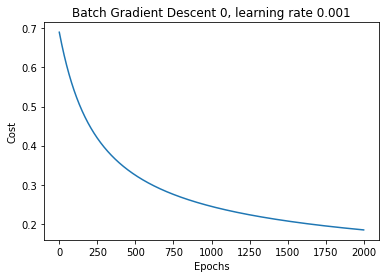

Accuracy for threshold = 0.3: 0.8670212765957447
Accuracy for threshold = 0.4: 0.9308510638297872
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9414893617021277
Batch Gradient Descent Done
====== Stochastic Gradient Descent 0, learning rate 0.001
Cost at iteration: 2000, 0.18049098312861658


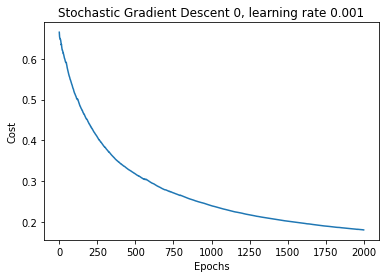

Accuracy for threshold = 0.3: 0.8723404255319149
Accuracy for threshold = 0.4: 0.925531914893617
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9414893617021277
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 0, learning rate 0.001 ======
Cost at iteration: 2000, 0.1960397594704833


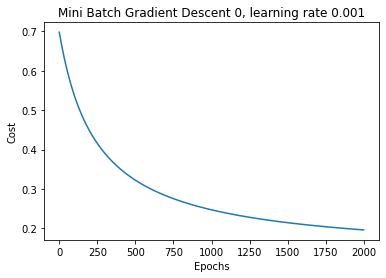

Accuracy for threshold = 0.3: 0.8670212765957447
Accuracy for threshold = 0.4: 0.9202127659574468
Accuracy for threshold = 0.6: 0.9468085106382979
Accuracy for threshold = 0.7: 0.9414893617021277
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 1, learning rate 0.001 ======
Cost at iteration: 2000, 0.1816676838597905


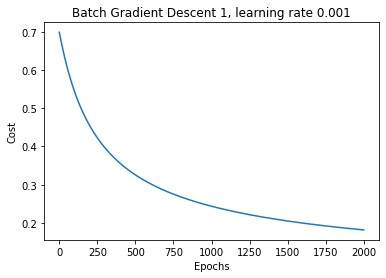

Accuracy for threshold = 0.3: 0.8936170212765957
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9361702127659575
Accuracy for threshold = 0.7: 0.9361702127659575
Batch Gradient Descent Done
====== Stochastic Gradient Descent 1, learning rate 0.001
Cost at iteration: 2000, 0.18005295539806057


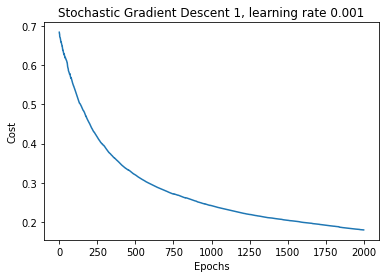

Accuracy for threshold = 0.3: 0.9042553191489362
Accuracy for threshold = 0.4: 0.9361702127659575
Accuracy for threshold = 0.6: 0.9361702127659575
Accuracy for threshold = 0.7: 0.9308510638297872
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 1, learning rate 0.001 ======
Cost at iteration: 2000, 0.18762995193945617


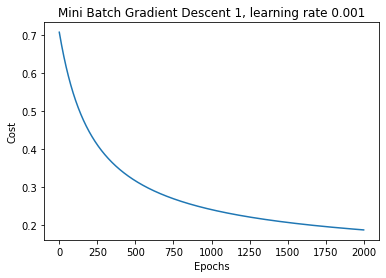

Accuracy for threshold = 0.3: 0.8882978723404256
Accuracy for threshold = 0.4: 0.9308510638297872
Accuracy for threshold = 0.6: 0.9361702127659575
Accuracy for threshold = 0.7: 0.9202127659574468
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 2, learning rate 0.001 ======
Cost at iteration: 2000, 0.18827201817634961


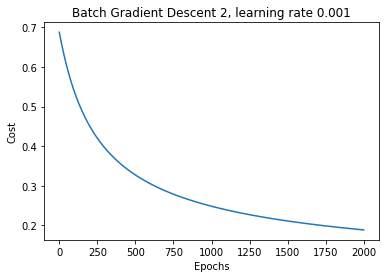

Accuracy for threshold = 0.3: 0.8882978723404256
Accuracy for threshold = 0.4: 0.9521276595744681
Accuracy for threshold = 0.6: 0.9627659574468085
Accuracy for threshold = 0.7: 0.9574468085106383
Batch Gradient Descent Done
====== Stochastic Gradient Descent 2, learning rate 0.001
Cost at iteration: 2000, 0.19212720802973693


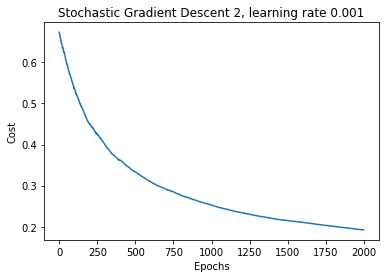

Accuracy for threshold = 0.3: 0.8829787234042553
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9468085106382979
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 2, learning rate 0.001 ======
Cost at iteration: 2000, 0.18794062894756486


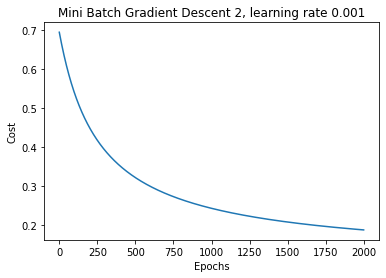

Accuracy for threshold = 0.3: 0.8776595744680851
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9468085106382979
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 3, learning rate 0.001 ======
Cost at iteration: 2000, 0.18492067727652034


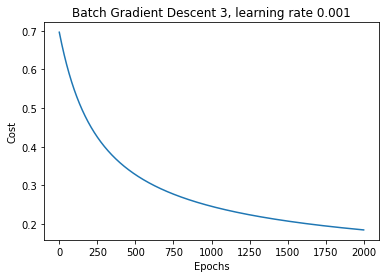

Accuracy for threshold = 0.3: 0.8776595744680851
Accuracy for threshold = 0.4: 0.8936170212765957
Accuracy for threshold = 0.6: 0.9308510638297872
Accuracy for threshold = 0.7: 0.9521276595744681
Batch Gradient Descent Done
====== Stochastic Gradient Descent 3, learning rate 0.001
Cost at iteration: 2000, 0.18359364374069573


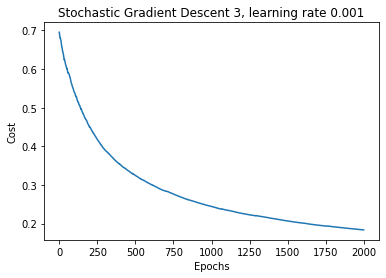

Accuracy for threshold = 0.3: 0.8776595744680851
Accuracy for threshold = 0.4: 0.898936170212766
Accuracy for threshold = 0.6: 0.9308510638297872
Accuracy for threshold = 0.7: 0.9521276595744681
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 3, learning rate 0.001 ======
Cost at iteration: 2000, 0.19561812396189682


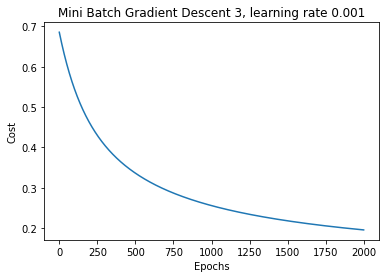

Accuracy for threshold = 0.3: 0.851063829787234
Accuracy for threshold = 0.4: 0.898936170212766
Accuracy for threshold = 0.6: 0.9308510638297872
Accuracy for threshold = 0.7: 0.9521276595744681
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 4, learning rate 0.001 ======
Cost at iteration: 2000, 0.18004859086727035


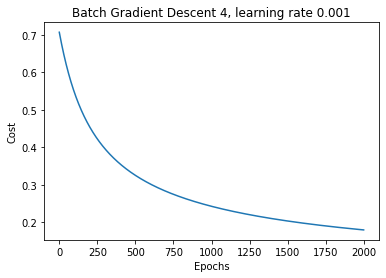

Accuracy for threshold = 0.3: 0.8829787234042553
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9521276595744681
Batch Gradient Descent Done
====== Stochastic Gradient Descent 4, learning rate 0.001
Cost at iteration: 2000, 0.1801091347994058


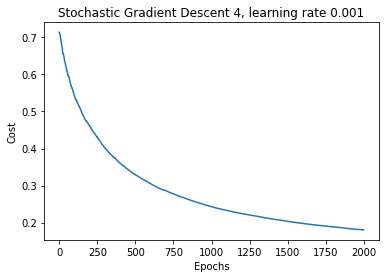

Accuracy for threshold = 0.3: 0.8829787234042553
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9521276595744681
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 4, learning rate 0.001 ======
Cost at iteration: 2000, 0.17991462351493456


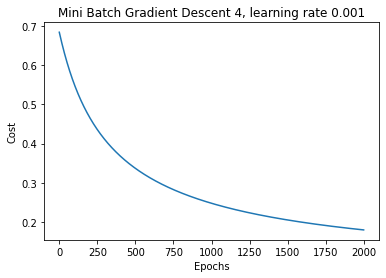

Accuracy for threshold = 0.3: 0.8882978723404256
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9361702127659575
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 5, learning rate 0.001 ======
Cost at iteration: 2000, 0.19099949706117772


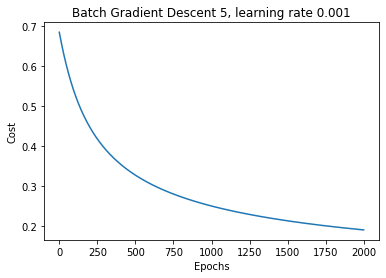

Accuracy for threshold = 0.3: 0.9095744680851063
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9468085106382979
Accuracy for threshold = 0.7: 0.9468085106382979
Batch Gradient Descent Done
====== Stochastic Gradient Descent 5, learning rate 0.001
Cost at iteration: 2000, 0.1907157836734403


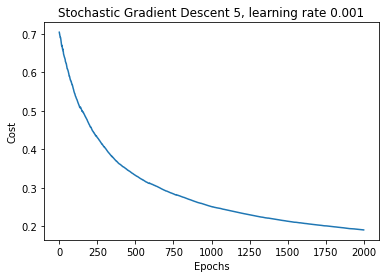

Accuracy for threshold = 0.3: 0.9042553191489362
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9414893617021277
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 5, learning rate 0.001 ======
Cost at iteration: 2000, 0.19927101006942297


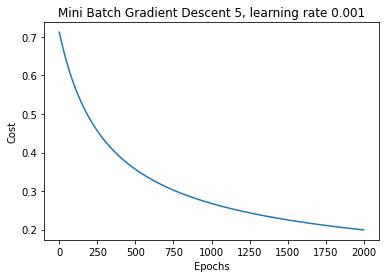

Accuracy for threshold = 0.3: 0.898936170212766
Accuracy for threshold = 0.4: 0.9361702127659575
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9308510638297872
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 6, learning rate 0.001 ======
Cost at iteration: 2000, 0.18513717178175962


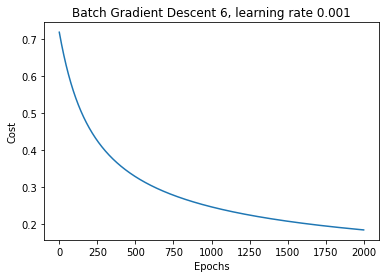

Accuracy for threshold = 0.3: 0.8936170212765957
Accuracy for threshold = 0.4: 0.9361702127659575
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9521276595744681
Batch Gradient Descent Done
====== Stochastic Gradient Descent 6, learning rate 0.001
Cost at iteration: 2000, 0.18692455239514527


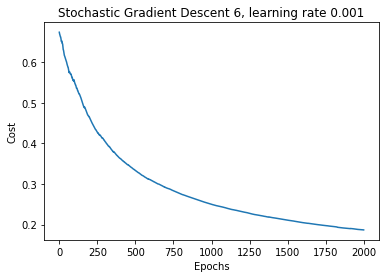

Accuracy for threshold = 0.3: 0.8936170212765957
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9521276595744681
Accuracy for threshold = 0.7: 0.9468085106382979
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 6, learning rate 0.001 ======
Cost at iteration: 2000, 0.18433804369232912


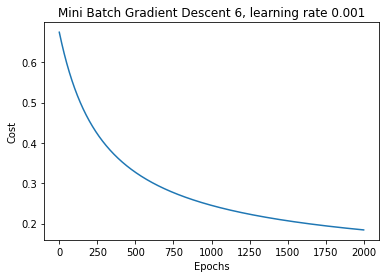

Accuracy for threshold = 0.3: 0.8882978723404256
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9468085106382979
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 7, learning rate 0.001 ======
Cost at iteration: 2000, 0.17697043959649333


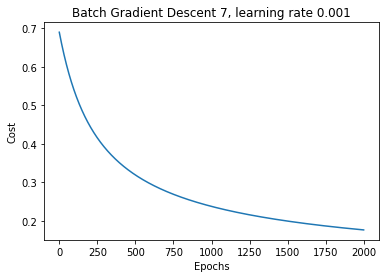

Accuracy for threshold = 0.3: 0.8829787234042553
Accuracy for threshold = 0.4: 0.925531914893617
Accuracy for threshold = 0.6: 0.925531914893617
Accuracy for threshold = 0.7: 0.9202127659574468
Batch Gradient Descent Done
====== Stochastic Gradient Descent 7, learning rate 0.001
Cost at iteration: 2000, 0.17595289194625913


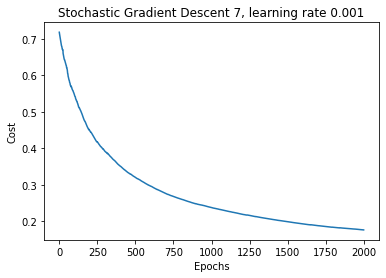

Accuracy for threshold = 0.3: 0.8829787234042553
Accuracy for threshold = 0.4: 0.925531914893617
Accuracy for threshold = 0.6: 0.9468085106382979
Accuracy for threshold = 0.7: 0.925531914893617
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 7, learning rate 0.001 ======
Cost at iteration: 2000, 0.19394390405614545


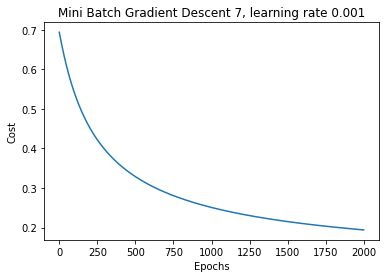

Accuracy for threshold = 0.3: 0.898936170212766
Accuracy for threshold = 0.4: 0.9468085106382979
Accuracy for threshold = 0.6: 0.9361702127659575
Accuracy for threshold = 0.7: 0.898936170212766
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 8, learning rate 0.001 ======
Cost at iteration: 2000, 0.1837364956288599


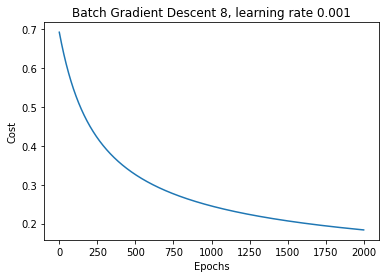

Accuracy for threshold = 0.3: 0.8829787234042553
Accuracy for threshold = 0.4: 0.925531914893617
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9574468085106383
Batch Gradient Descent Done
====== Stochastic Gradient Descent 8, learning rate 0.001
Cost at iteration: 2000, 0.18493446196309307


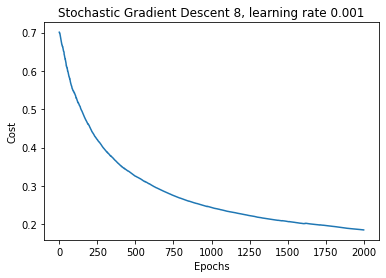

Accuracy for threshold = 0.3: 0.8723404255319149
Accuracy for threshold = 0.4: 0.9361702127659575
Accuracy for threshold = 0.6: 0.9680851063829787
Accuracy for threshold = 0.7: 0.9521276595744681
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 8, learning rate 0.001 ======
Cost at iteration: 2000, 0.18244913628108814


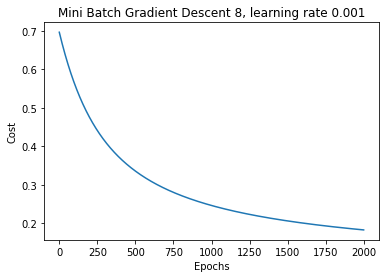

Accuracy for threshold = 0.3: 0.8723404255319149
Accuracy for threshold = 0.4: 0.9202127659574468
Accuracy for threshold = 0.6: 0.9574468085106383
Accuracy for threshold = 0.7: 0.9574468085106383
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 9, learning rate 0.001 ======
Cost at iteration: 2000, 0.18354050780652173


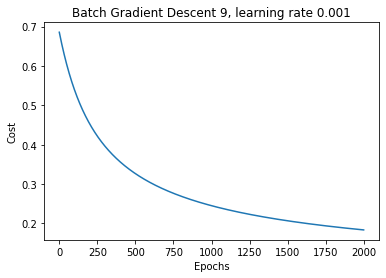

Accuracy for threshold = 0.3: 0.9095744680851063
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.9308510638297872
Accuracy for threshold = 0.7: 0.9308510638297872
Batch Gradient Descent Done
====== Stochastic Gradient Descent 9, learning rate 0.001
Cost at iteration: 2000, 0.1819552437535698


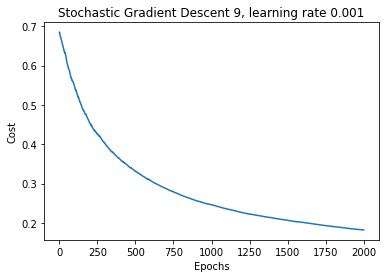

Accuracy for threshold = 0.3: 0.9095744680851063
Accuracy for threshold = 0.4: 0.9414893617021277
Accuracy for threshold = 0.6: 0.925531914893617
Accuracy for threshold = 0.7: 0.925531914893617
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 9, learning rate 0.001 ======
Cost at iteration: 2000, 0.18985808397031081


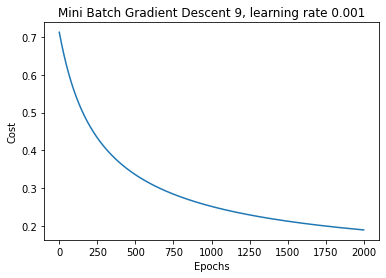

Accuracy for threshold = 0.3: 0.8936170212765957
Accuracy for threshold = 0.4: 0.9361702127659575
Accuracy for threshold = 0.6: 0.9361702127659575
Accuracy for threshold = 0.7: 0.9308510638297872
Mini Batch Gradient Descent Done
Batch Average Train and Test Metrics: {'TP': 135.1, 'TN': 232.6, 'FP': 5.0, 'FN': 8.3, 'Total': 381.0, 'Accuracy': 0.9650918635170603, 'Precision': 0.9644182402206238, 'Recall': 0.941857479821776}
 {'TP': 65.2, 'TN': 114.1, 'FP': 5.3, 'FN': 3.4, 'Total': 188.0, 'Accuracy': 0.9537234042553193, 'Precision': 0.9267369915977792, 'Recall': 0.949860419774434}
Stochastic Average Train and Test Metrics: {'TP': 135.6, 'TN': 232.4, 'FP': 5.2, 'FN': 7.8, 'Total': 381.0, 'Accuracy': 0.9658792650918636, 'Precision': 0.9633466037961285, 'Recall': 0.9453887134948318}
 {'TP': 65.4, 'TN': 114.2, 'FP': 5.2, 'FN': 3.2, 'Total': 188.0, 'Accuracy': 0.9553191489361703, 'Precision': 0.9282723908724607, 'Recall': 0.952827452741467}
Mini Batch Average Train and Test Metrics: {'TP': 134

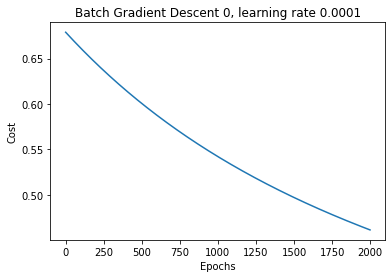

Accuracy for threshold = 0.3: 0.5
Accuracy for threshold = 0.4: 0.824468085106383
Accuracy for threshold = 0.6: 0.8936170212765957
Accuracy for threshold = 0.7: 0.7553191489361702
Batch Gradient Descent Done
====== Stochastic Gradient Descent 0, learning rate 0.0001
Cost at iteration: 2000, 0.46406437505142567


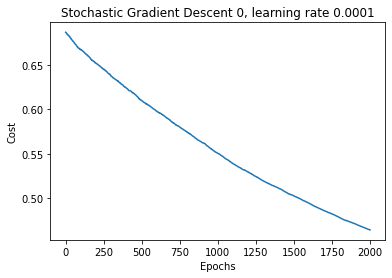

Accuracy for threshold = 0.3: 0.48936170212765956
Accuracy for threshold = 0.4: 0.8138297872340425
Accuracy for threshold = 0.6: 0.8776595744680851
Accuracy for threshold = 0.7: 0.7553191489361702
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 0, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4782754266854474


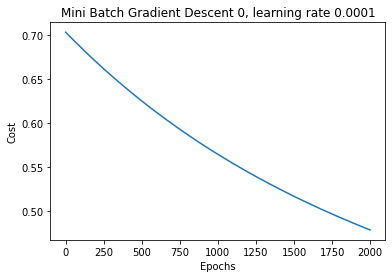

Accuracy for threshold = 0.3: 0.46808510638297873
Accuracy for threshold = 0.4: 0.776595744680851
Accuracy for threshold = 0.6: 0.8829787234042553
Accuracy for threshold = 0.7: 0.7393617021276596
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 1, learning rate 0.0001 ======
Cost at iteration: 2000, 0.45282680587947916


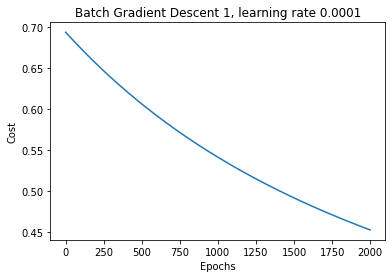

Accuracy for threshold = 0.3: 0.4574468085106383
Accuracy for threshold = 0.4: 0.7872340425531915
Accuracy for threshold = 0.6: 0.8882978723404256
Accuracy for threshold = 0.7: 0.7872340425531915
Batch Gradient Descent Done
====== Stochastic Gradient Descent 1, learning rate 0.0001
Cost at iteration: 2000, 0.4499811112540928


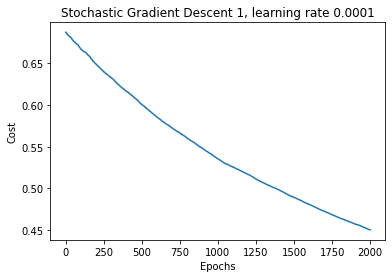

Accuracy for threshold = 0.3: 0.4574468085106383
Accuracy for threshold = 0.4: 0.8031914893617021
Accuracy for threshold = 0.6: 0.8882978723404256
Accuracy for threshold = 0.7: 0.7819148936170213
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 1, learning rate 0.0001 ======
Cost at iteration: 2000, 0.45376720334545506


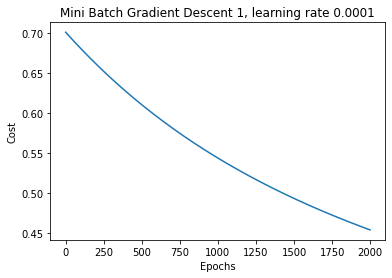

Accuracy for threshold = 0.3: 0.44680851063829785
Accuracy for threshold = 0.4: 0.8031914893617021
Accuracy for threshold = 0.6: 0.8882978723404256
Accuracy for threshold = 0.7: 0.776595744680851
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 2, learning rate 0.0001 ======
Cost at iteration: 2000, 0.45737213331333926


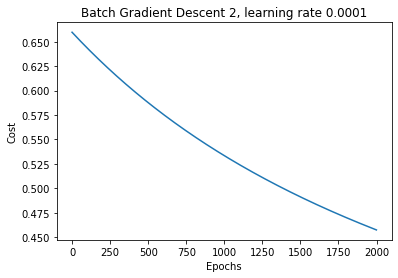

Accuracy for threshold = 0.3: 0.48404255319148937
Accuracy for threshold = 0.4: 0.8138297872340425
Accuracy for threshold = 0.6: 0.9308510638297872
Accuracy for threshold = 0.7: 0.8138297872340425
Batch Gradient Descent Done
====== Stochastic Gradient Descent 2, learning rate 0.0001
Cost at iteration: 2000, 0.46822391384648293


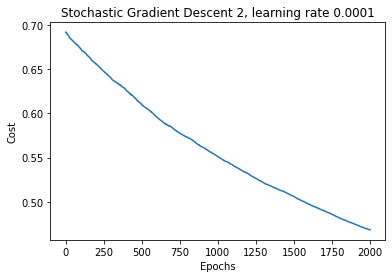

Accuracy for threshold = 0.3: 0.44680851063829785
Accuracy for threshold = 0.4: 0.776595744680851
Accuracy for threshold = 0.6: 0.9202127659574468
Accuracy for threshold = 0.7: 0.776595744680851
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 2, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4531184907715163


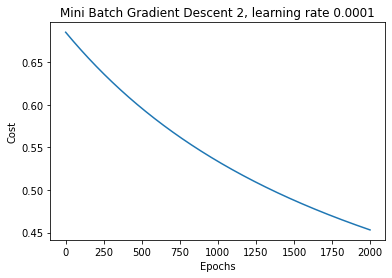

Accuracy for threshold = 0.3: 0.5106382978723404
Accuracy for threshold = 0.4: 0.8191489361702128
Accuracy for threshold = 0.6: 0.9308510638297872
Accuracy for threshold = 0.7: 0.8297872340425532
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 3, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4558514671305856


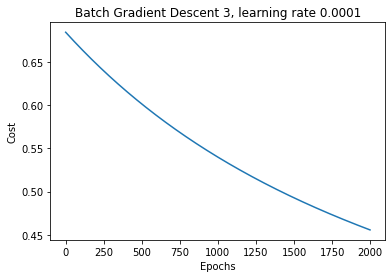

Accuracy for threshold = 0.3: 0.4574468085106383
Accuracy for threshold = 0.4: 0.7978723404255319
Accuracy for threshold = 0.6: 0.8936170212765957
Accuracy for threshold = 0.7: 0.776595744680851
Batch Gradient Descent Done
====== Stochastic Gradient Descent 3, learning rate 0.0001
Cost at iteration: 2000, 0.46387088523661846


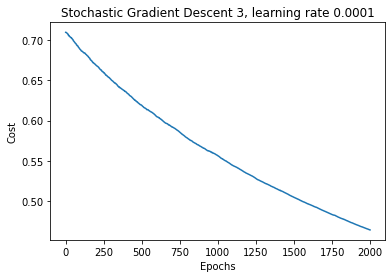

Accuracy for threshold = 0.3: 0.44680851063829785
Accuracy for threshold = 0.4: 0.776595744680851
Accuracy for threshold = 0.6: 0.8829787234042553
Accuracy for threshold = 0.7: 0.7659574468085106
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 3, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4808020574985749


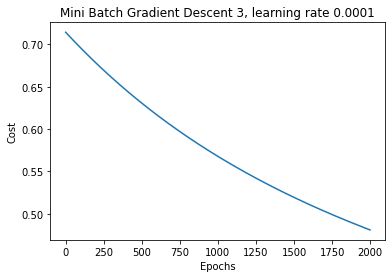

Accuracy for threshold = 0.3: 0.4148936170212766
Accuracy for threshold = 0.4: 0.723404255319149
Accuracy for threshold = 0.6: 0.851063829787234
Accuracy for threshold = 0.7: 0.7393617021276596
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 4, learning rate 0.0001 ======
Cost at iteration: 2000, 0.44065065975480744


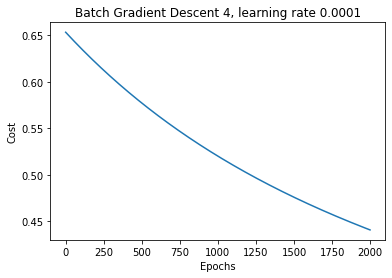

Accuracy for threshold = 0.3: 0.46808510638297873
Accuracy for threshold = 0.4: 0.8191489361702128
Accuracy for threshold = 0.6: 0.8829787234042553
Accuracy for threshold = 0.7: 0.7872340425531915
Batch Gradient Descent Done
====== Stochastic Gradient Descent 4, learning rate 0.0001
Cost at iteration: 2000, 0.4593069307116623


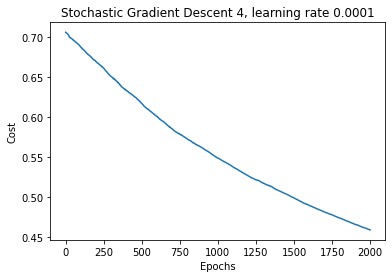

Accuracy for threshold = 0.3: 0.42021276595744683
Accuracy for threshold = 0.4: 0.7659574468085106
Accuracy for threshold = 0.6: 0.8723404255319149
Accuracy for threshold = 0.7: 0.7659574468085106
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 4, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4701152794281885


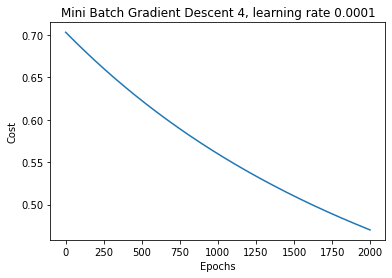

Accuracy for threshold = 0.3: 0.4095744680851064
Accuracy for threshold = 0.4: 0.7606382978723404
Accuracy for threshold = 0.6: 0.8617021276595744
Accuracy for threshold = 0.7: 0.7393617021276596
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 5, learning rate 0.0001 ======
Cost at iteration: 2000, 0.449723629360856


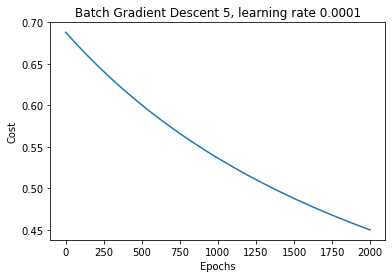

Accuracy for threshold = 0.3: 0.46808510638297873
Accuracy for threshold = 0.4: 0.7872340425531915
Accuracy for threshold = 0.6: 0.8936170212765957
Accuracy for threshold = 0.7: 0.7446808510638298
Batch Gradient Descent Done
====== Stochastic Gradient Descent 5, learning rate 0.0001
Cost at iteration: 2000, 0.4405140257608725


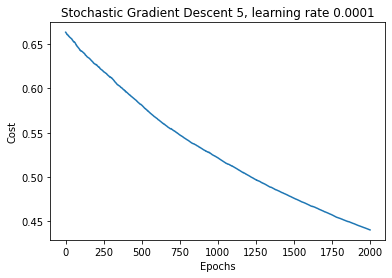

Accuracy for threshold = 0.3: 0.48936170212765956
Accuracy for threshold = 0.4: 0.8031914893617021
Accuracy for threshold = 0.6: 0.8829787234042553
Accuracy for threshold = 0.7: 0.7553191489361702
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 5, learning rate 0.0001 ======
Cost at iteration: 2000, 0.43059881568523384


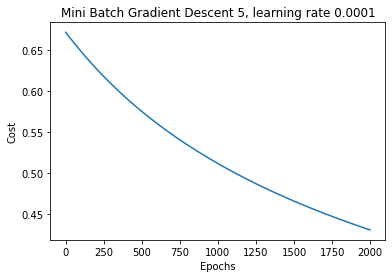

Accuracy for threshold = 0.3: 0.5053191489361702
Accuracy for threshold = 0.4: 0.8297872340425532
Accuracy for threshold = 0.6: 0.8776595744680851
Accuracy for threshold = 0.7: 0.7553191489361702
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 6, learning rate 0.0001 ======
Cost at iteration: 2000, 0.455372533778756


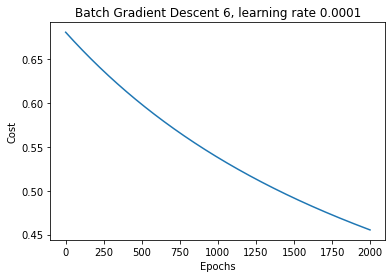

Accuracy for threshold = 0.3: 0.42021276595744683
Accuracy for threshold = 0.4: 0.8031914893617021
Accuracy for threshold = 0.6: 0.9042553191489362
Accuracy for threshold = 0.7: 0.7978723404255319
Batch Gradient Descent Done
====== Stochastic Gradient Descent 6, learning rate 0.0001
Cost at iteration: 2000, 0.45969789957252777


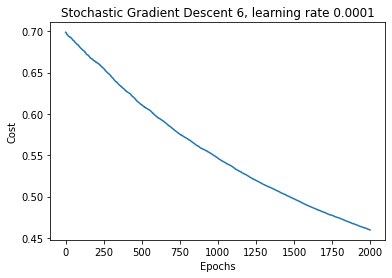

Accuracy for threshold = 0.3: 0.425531914893617
Accuracy for threshold = 0.4: 0.8138297872340425
Accuracy for threshold = 0.6: 0.898936170212766
Accuracy for threshold = 0.7: 0.7872340425531915
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 6, learning rate 0.0001 ======
Cost at iteration: 2000, 0.42965404325257456


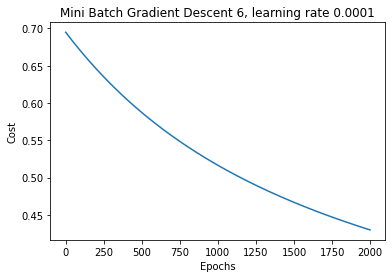

Accuracy for threshold = 0.3: 0.48936170212765956
Accuracy for threshold = 0.4: 0.851063829787234
Accuracy for threshold = 0.6: 0.9202127659574468
Accuracy for threshold = 0.7: 0.8191489361702128
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 7, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4429286939064917


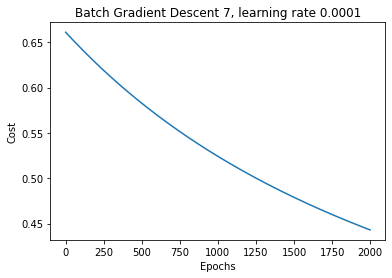

Accuracy for threshold = 0.3: 0.44680851063829785
Accuracy for threshold = 0.4: 0.8085106382978723
Accuracy for threshold = 0.6: 0.8882978723404256
Accuracy for threshold = 0.7: 0.8031914893617021
Batch Gradient Descent Done
====== Stochastic Gradient Descent 7, learning rate 0.0001
Cost at iteration: 2000, 0.4569840022404755


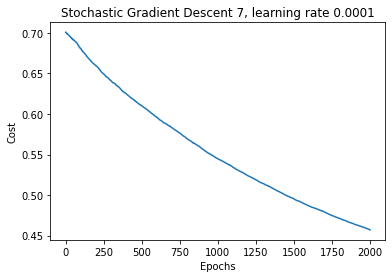

Accuracy for threshold = 0.3: 0.40425531914893614
Accuracy for threshold = 0.4: 0.7872340425531915
Accuracy for threshold = 0.6: 0.8829787234042553
Accuracy for threshold = 0.7: 0.7925531914893617
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 7, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4385182355313062


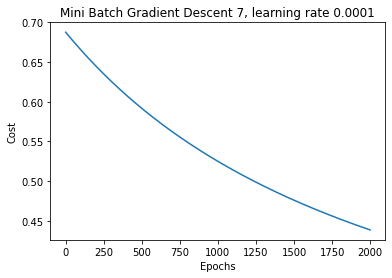

Accuracy for threshold = 0.3: 0.46808510638297873
Accuracy for threshold = 0.4: 0.824468085106383
Accuracy for threshold = 0.6: 0.8829787234042553
Accuracy for threshold = 0.7: 0.8085106382978723
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 8, learning rate 0.0001 ======
Cost at iteration: 2000, 0.45018636188294525


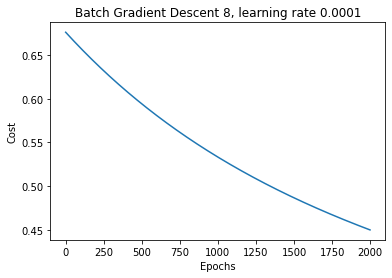

Accuracy for threshold = 0.3: 0.4521276595744681
Accuracy for threshold = 0.4: 0.7872340425531915
Accuracy for threshold = 0.6: 0.9042553191489362
Accuracy for threshold = 0.7: 0.8031914893617021
Batch Gradient Descent Done
====== Stochastic Gradient Descent 8, learning rate 0.0001
Cost at iteration: 2000, 0.4545754693657773


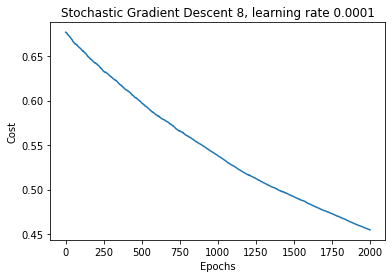

Accuracy for threshold = 0.3: 0.44148936170212766
Accuracy for threshold = 0.4: 0.75
Accuracy for threshold = 0.6: 0.898936170212766
Accuracy for threshold = 0.7: 0.7978723404255319
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 8, learning rate 0.0001 ======
Cost at iteration: 2000, 0.47824527680079343


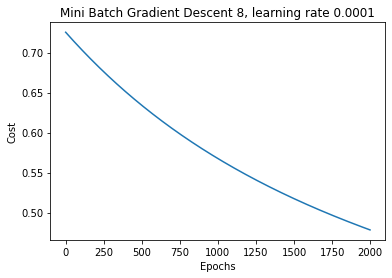

Accuracy for threshold = 0.3: 0.3882978723404255
Accuracy for threshold = 0.4: 0.6808510638297872
Accuracy for threshold = 0.6: 0.8617021276595744
Accuracy for threshold = 0.7: 0.7606382978723404
Mini Batch Gradient Descent Done
====== Batch Gradient Descent 9, learning rate 0.0001 ======
Cost at iteration: 2000, 0.47817872883284795


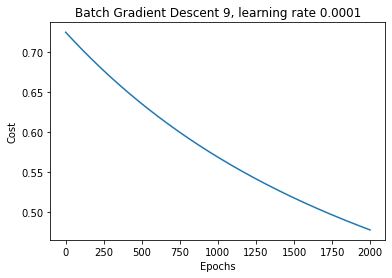

Accuracy for threshold = 0.3: 0.42021276595744683
Accuracy for threshold = 0.4: 0.7712765957446809
Accuracy for threshold = 0.6: 0.9095744680851063
Accuracy for threshold = 0.7: 0.7712765957446809
Batch Gradient Descent Done
====== Stochastic Gradient Descent 9, learning rate 0.0001
Cost at iteration: 2000, 0.4661573903534371


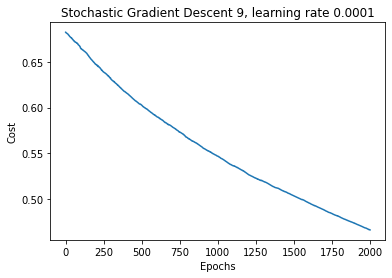

Accuracy for threshold = 0.3: 0.4308510638297872
Accuracy for threshold = 0.4: 0.7925531914893617
Accuracy for threshold = 0.6: 0.9148936170212766
Accuracy for threshold = 0.7: 0.7872340425531915
Stochastic Gradient Descent Done
====== Mini Batch Gradient Descent 9, learning rate 0.0001 ======
Cost at iteration: 2000, 0.4600682531959757


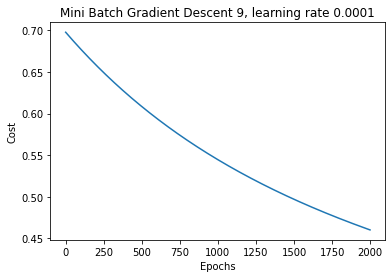

Accuracy for threshold = 0.3: 0.46808510638297873
Accuracy for threshold = 0.4: 0.7925531914893617
Accuracy for threshold = 0.6: 0.9148936170212766
Accuracy for threshold = 0.7: 0.7978723404255319
Mini Batch Gradient Descent Done
Batch Average Train and Test Metrics: {'TP': 128.8, 'TN': 227.3, 'FP': 13.3, 'FN': 11.6, 'Total': 381.0, 'Accuracy': 0.9346456692913387, 'Precision': 0.9063258284063764, 'Recall': 0.9172060576657524}
 {'TP': 65.9, 'TN': 111.0, 'FP': 5.4, 'FN': 5.7, 'Total': 188.0, 'Accuracy': 0.9409574468085108, 'Precision': 0.925586178134021, 'Recall': 0.9201331439796749}
Stochastic Average Train and Test Metrics: {'TP': 128.9, 'TN': 228.2, 'FP': 12.4, 'FN': 11.5, 'Total': 381.0, 'Accuracy': 0.937270341207349, 'Precision': 0.9124776509408716, 'Recall': 0.9180998372110178}
 {'TP': 65.9, 'TN': 112.0, 'FP': 4.4, 'FN': 5.7, 'Total': 188.0, 'Accuracy': 0.9462765957446809, 'Precision': 0.9373931628443721, 'Recall': 0.9202938917570929}
Mini Batch Average Train and Test Metrics: {'TP

In [ ]:
#Part C Learning Task 2
learning_rates = [0.01, 0.001, 0.0001]
lrbatchtrain_metrics1, lrbatchtest_metrics1 = list(), list()
lrstochastictrain_metrics1, lrstochastictest_metrics1 = list(), list()
lrminibatchtrain_metrics1, lrminibatchtest_metrics1 = list(), list()
R = np.random.RandomState(20)
for lr in learning_rates:
  batchtrain_metrics, batchtest_metrics = list(), list()
  stochastictrain_metrics, stochastictest_metrics = list(), list()
  minibatchtrain_metrics, minibatchtest_metrics = list(), list()
  for i in range(10):
    df_train = df.sample(frac = 0.67)
    df_test = df.drop(df_train.index)
    xtrain, xtest = df_train.drop(['diagnosis'], axis = 1).to_numpy(), df_test.drop(['diagnosis'], axis = 1).to_numpy()
    ytrain, ytest = df_train['diagnosis'].to_numpy().reshape(-1, 1), df_test['diagnosis'].to_numpy().reshape(-1, 1)
    xtrain = np.c_[np.ones((xtrain.shape[0], 1)), xtrain]
    xtest = np.c_[np.ones((xtest.shape[0], 1)), xtest]
    w = R.randn(xtrain.shape[1], 1)*0.01
    print("====== Batch Gradient Descent {}, learning rate {} ======".format(i, lr))
    w, his1 = batch_grad(xtrain, ytrain, w, lr, 2000)
    plt.plot(np.arange(2000),his1)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title("Batch Gradient Descent {}, learning rate {}".format(i, lr))
    plt.show()
    y_predtrain = sigmoid(xtrain.dot(w))
    y_predtest = sigmoid(xtest.dot(w))
    train_metrics = get_metrics(ytrain, y_predtrain, 0.5)
    test_metrics = get_metrics(ytest, y_predtest, 0.5)
    print("Accuracy for threshold = 0.3: {}".format(get_metrics(ytest, y_predtest, 0.3)['Accuracy']))
    print("Accuracy for threshold = 0.4: {}".format(get_metrics(ytest, y_predtest, 0.4)['Accuracy']))
    print("Accuracy for threshold = 0.6: {}".format(get_metrics(ytest, y_predtest, 0.6)['Accuracy']))
    print("Accuracy for threshold = 0.7: {}".format(get_metrics(ytest, y_predtest, 0.7)['Accuracy']))
    batchtrain_metrics.append(train_metrics)
    batchtest_metrics.append(test_metrics)
    # print("Training metrics and Testing metrics: {}\n  {}".format(train_metrics, test_metrics))
    print("Batch Gradient Descent Done")
    w = R.randn(xtrain.shape[1], 1)*0.01
    print("====== Stochastic Gradient Descent {}, learning rate {}".format(i, lr))
    w, his2 = stochastic_grad(xtrain, ytrain, w, lr, 2000)
    plt.plot(np.arange(2000),his2)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title("Stochastic Gradient Descent {}, learning rate {}".format(i, lr))
    plt.show()
    y_predtrain = sigmoid(xtrain.dot(w))
    y_predtest = sigmoid(xtest.dot(w))
    train_metrics = get_metrics(ytrain, y_predtrain, 0.5)
    test_metrics = get_metrics(ytest, y_predtest, 0.5)
    print("Accuracy for threshold = 0.3: {}".format(get_metrics(ytest, y_predtest, 0.3)['Accuracy']))
    print("Accuracy for threshold = 0.4: {}".format(get_metrics(ytest, y_predtest, 0.4)['Accuracy']))
    print("Accuracy for threshold = 0.6: {}".format(get_metrics(ytest, y_predtest, 0.6)['Accuracy']))
    print("Accuracy for threshold = 0.7: {}".format(get_metrics(ytest, y_predtest, 0.7)['Accuracy']))
    stochastictrain_metrics.append(train_metrics)
    stochastictest_metrics.append(test_metrics)
    # plot_confusion_matrix(metrics)
    # print("Training metrics and Testing metrics: {}\n  {}".format(train_metrics, test_metrics))
    print("Stochastic Gradient Descent Done")
    w = R.randn(xtrain.shape[1], 1)*0.01
    print("====== Mini Batch Gradient Descent {}, learning rate {} ======".format(i, lr))
    w, his3 = minibatch_grad(xtrain, ytrain, w, lr, 2000, 10)
    plt.plot(np.arange(2000),his3)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title("Mini Batch Gradient Descent {}, learning rate {}".format(i, lr))
    plt.show()
    y_predtrain = sigmoid(xtrain.dot(w))
    y_predtest = sigmoid(xtest.dot(w))
    train_metrics = get_metrics(ytrain, y_predtrain, 0.5)
    test_metrics = get_metrics(ytest, y_predtest, 0.5)
    print("Accuracy for threshold = 0.3: {}".format(get_metrics(ytest, y_predtest, 0.3)['Accuracy']))
    print("Accuracy for threshold = 0.4: {}".format(get_metrics(ytest, y_predtest, 0.4)['Accuracy']))
    print("Accuracy for threshold = 0.6: {}".format(get_metrics(ytest, y_predtest, 0.6)['Accuracy']))
    print("Accuracy for threshold = 0.7: {}".format(get_metrics(ytest, y_predtest, 0.7)['Accuracy']))
    minibatchtrain_metrics.append(train_metrics)
    minibatchtest_metrics.append(test_metrics)
    # print("Training metrics and Testing metrics: {}\n  {}".format(train_metrics, test_metrics))
    print("Mini Batch Gradient Descent Done")
  print("Batch Average Train and Test Metrics: {}\n {}".format(get_average_metrics(batchtrain_metrics), get_average_metrics(batchtest_metrics)))
  print("Stochastic Average Train and Test Metrics: {}\n {}".format(get_average_metrics(stochastictrain_metrics), get_average_metrics(stochastictest_metrics)))
  print("Mini Batch Average Train and Test Metrics: {}\n {}".format(get_average_metrics(minibatchtrain_metrics), get_average_metrics(minibatchtest_metrics)))
  lrbatchtrain_metrics1.append(batchtrain_metrics)
  lrbatchtest_metrics1.append(batchtest_metrics)
  lrstochastictrain_metrics1.append(stochastictrain_metrics)
  lrstochastictest_metrics1.append(stochastictest_metrics)
  lrminibatchtrain_metrics1.append(minibatchtrain_metrics)
  lrminibatchtest_metrics1.append(minibatchtest_metrics)

In [ ]:
#Batch, Stochastic, Mini Batch Testing and Training Accuracies
for i, lr in zip(range(3), learning_rates):
  print("{}\n".format(lr))
  print("Batch Training Accuracy,Batch Testing Accuracy")
  for m1, m2 in zip(lrbatchtrain_metrics1[i], lrbatchtest_metrics1[i]):
    print("{},{}".format(m1['Accuracy'], m2['Accuracy']))
  print("\nStochastic Training Accuracy,Stochastic Testing Accuracy")
  for m1, m2 in zip(lrstochastictrain_metrics1[i], lrstochastictest_metrics1[i]):
    print("{},{}".format(m1['Accuracy'], m2['Accuracy']))
  print("\nMini Batch Training Accuracy,Mini Batch Testing Accuracy")
  for m1, m2 in zip(lrminibatchtrain_metrics1[i], lrminibatchtest_metrics1[i]):
    print("{},{}".format(m1['Accuracy'], m2['Accuracy']))
  print("\n")